# Лабораторная 1. Очистка набора данных

Отбор признаков - важная задача перед обучением модели машинного обучения. Признаки отбираются чаще всего вручную на основании описательной статистики, тепловой карты, показывающей линейную корреляцию и важности признаков. Никогда не смотрят только на что-то одно, всегда признаки рассматривают с разных сторон.

# Подключение модулей

In [413]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns

# Загрузка данных (регрессия)

В данной задаче у нас 29 признаков и 2 целевые переменные (G_total, КГФ).

In [414]:
targets = ['G_total', 'КГФ(т/тыч м3)']

In [415]:
df = pd.read_excel('data.xlsx', sheet_name='VU')

In [416]:
df

,Глубина манометра,Dшт,Руст(ср),Рзаб(ср),Pлин(ср),Руст(кон),Рзаб(кон),Рлин(кон),Туст,Тна шлейфе,Тзаб,Tлин,Дебит газа(стандарт),Дебит ст. конд(стандарт).,Дебит воды(стандарт),Дебит смеси(стандарт),Дебит гааз(лин),Дебит кон нестабильный(лин),Дебит воды(лин),Нэф,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб(бар),Pсб(атм),Ro_g,Ro_c,Ro_w,Удельная плотность газа,G_total,КГФ(г/м3),КГФ(т/тыч м3)
0,3590.0,17.46,209.641425,346.192061,NaN,209.641425,346.192061,NaN,65.0,NaN,103.300,NaN,692.600000,202.700000,1.200000,712.617222,NaN,NaN,NaN,57.2000,41.88000,52.3000,51.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3590.0,14.28,245.510475,371.912399,NaN,245.510475,371.912399,NaN,63.0,NaN,103.000,NaN,569.700000,204.400000,0.800000,586.165220,NaN,NaN,NaN,57.2000,41.88000,52.3000,51.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3590.0,11.11,270.943050,384.224400,NaN,270.943050,384.224400,NaN,56.0,NaN,102.900,NaN,341.500000,129.300000,0.100000,354.651203,NaN,NaN,NaN,57.2000,41.88000,52.3000,51.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3590.0,7.93,284.317950,391.823775,NaN,284.317950,391.823775,NaN,46.0,NaN,102.800,NaN,198.900000,70.600000,0.000000,206.056016,NaN,NaN,NaN,57.2000,41.88000,52.3000,51.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3952.0,14.30,259.392000,382.299225,NaN,259.392000,382.299225,NaN,55.7,NaN,107.100,NaN,581.300000,195.600000,0.400000,612.009600,NaN,NaN,NaN,45.2000,46.20000,55.9000,50.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3952.0,11.11,275.705325,397.599300,NaN,275.705325,397.599300,NaN,56.5,NaN,107.200,NaN,378.500000,168.900000,0.300000,405.862100,NaN,NaN,NaN,45.2000,46.20000,55.9000,50.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3952.0,7.94,289.485525,406.110600,NaN,289.485525,406.110600,NaN,39.5,NaN,107.400,NaN,202.100000,79.800000,0.000000,215.546300,NaN,NaN,NaN,45.2000,46.20000,55.9000,50.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3672.3,14.29,213.795750,306.710775,106.114781,213.795750,318.300000,106.639850,47.0,NaN,106.300,51.147601,563.908914,165.694839,1.419921,588.995686,4511.000000,256.8,1.5,43.0000,43.98000,58.8000,65.9,106.600000,105.206020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,3672.3,6.35,282.696750,375.048408,106.175169,282.696750,372.100000,105.487540,25.0,NaN,106.600,24.156162,164.793903,47.629675,0.874894,171.675381,1047.000000,75.0,0.9,43.0000,43.98000,58.8000,65.9,106.000000,104.613866,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,3672.3,9.53,268.511250,356.765325,106.421502,268.511250,354.600000,104.837070,47.0,NaN,106.800,36.774111,339.983963,100.069299,5.074245,354.420569,2422.000000,156.6,5.0,43.0000,43.98000,58.8000,65.9,105.800000,104.416482,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Описательная статистика

Описательная статистика для непрерывных и категориальных признаках отличается.

In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Глубина манометра               181 non-null    float64
 1   Dшт                             185 non-null    float64
 2   Руст(ср)                        185 non-null    float64
 3   Рзаб(ср)                        181 non-null    float64
 4   Pлин(ср)                        178 non-null    float64
 5   Руст(кон)                       185 non-null    float64
 6   Рзаб(кон)                       181 non-null    float64
 7   Рлин(кон)                       174 non-null    float64
 8   Туст                            185 non-null    float64
 9   Тна шлейфе                      123 non-null    float64
 10  Тзаб                            181 non-null    float64
 11  Tлин                            178 non-null    float64
 12  Дебит газа(стандарт)            185 

In [418]:
df.describe()

,Глубина манометра,Dшт,Руст(ср),Рзаб(ср),Pлин(ср),Руст(кон),Рзаб(кон),Рлин(кон),Туст,Тна шлейфе,Тзаб,Tлин,Дебит газа(стандарт),Дебит ст. конд(стандарт).,Дебит воды(стандарт),Дебит смеси(стандарт),Дебит гааз(лин),Дебит кон нестабильный(лин),Дебит воды(лин),Нэф,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб(бар),Pсб(атм),Ro_g,Ro_c,Ro_w,Удельная плотность газа,G_total,КГФ(г/м3),КГФ(т/тыч м3)
count,181.000000,185.000000,185.000000,181.000000,178.000000,185.000000,181.000000,174.000000,185.000000,123.000000,181.000000,178.000000,185.000000,185.000000,185.000000,176.000000,178.000000,178.000000,178.000000,185.000000,177.000000,158.000000,135.000000,178.000000,178.000000,23.000000,93.000000,23.0,93.000000,23.000000,23.000000,93.000000
mean,3565.568508,10.997405,229.597848,330.836999,97.588175,228.768131,328.707200,98.147579,55.284865,39.765854,105.304630,38.839565,382.870055,114.397308,2.407085,405.780555,3441.014650,177.871348,2.516854,48.478223,39.895667,51.279357,52.077037,94.987597,93.745470,0.807631,780.847527,1000.0,0.665260,5.742359,265.028478,0.201706
std,126.201874,2.493816,48.864049,63.501186,12.464947,48.902445,64.582742,9.800728,10.959738,13.944567,1.394948,9.087249,153.070183,58.848155,2.273610,161.208785,2352.277677,91.250025,2.319031,12.325657,5.320672,5.724079,5.952397,5.347800,5.277868,0.015076,62.795111,0.0,0.020485,2.112717,40.997125,0.049254
min,3276.000000,6.350000,111.100000,169.250000,19.600000,109.000000,160.000000,40.739839,24.200000,14.000000,100.210000,16.204686,100.300000,26.200000,0.000000,117.868700,755.630000,48.600000,0.000000,22.100000,23.780000,34.000000,41.600000,83.700000,82.605477,0.787416,186.000000,1000.0,0.570000,2.782623,199.627612,0.131000
25%,3548.500000,9.530000,200.000000,296.800000,94.925000,200.000000,293.900000,94.431548,48.200000,32.050000,104.600000,32.471191,251.500000,72.700000,0.728749,267.758570,2013.207500,114.900000,0.825000,43.000000,36.990000,48.150000,48.600000,90.311538,89.130559,0.787416,782.000000,1000.0,0.660000,4.381813,237.545619,0.164000
50%,3577.500000,11.110000,232.000000,338.830800,99.645512,231.000000,337.000000,99.400000,56.500000,38.500000,105.370000,39.396874,366.218938,98.200438,1.554165,388.149710,3041.244840,155.300000,1.700000,45.200000,39.440000,49.800000,50.700000,94.800000,93.560326,0.806017,787.000000,1000.0,0.667000,5.250915,255.681127,0.192000
75%,3653.000000,12.700000,260.305556,372.620000,103.167190,259.392000,372.100000,103.487823,64.000000,45.900000,106.470000,46.474599,489.673000,142.148359,3.496397,509.218789,4194.625000,221.825000,3.500000,62.572400,42.980000,55.900000,56.000000,98.825000,97.532692,0.821344,793.700000,1000.0,0.679000,6.125723,288.891902,0.224000
max,3952.000000,17.460000,348.000000,458.600000,121.682930,348.000000,458.500000,123.616800,75.000000,106.800000,107.620000,55.513904,846.816143,302.621077,11.222107,896.908271,18965.000000,492.800000,11.400000,72.539800,53.270000,64.100000,65.900000,106.600000,105.206020,0.824330,801.000000,1000.0,0.684660,10.931155,385.415949,0.385416


Стандартные функции pandas не выводят всю необходимую описательную статистику, поэтому создадим свою таблицу с описательной статистикой. Для удобства закрасим признаки с единичной мощностью и большим количеством пропусков, чтобы потом их было легче удалить.

In [419]:
C = len(df.columns)
L = len(df.index)
CN = df.count()  #количество
NP = ((L - CN) / L) * 100  #процент пропущенных значений
MN = df.min()  #минимум
Q1 = df.quantile(q=0.25)  #первый квартиль
MA = df.mean()  #среднее значение
ME = df.median()  #медиана
Q3 = df.quantile(q=0.75)  #третий квартиль
MX = df.max()  #максимум
ST = df.std()  #стандартное отклонение
P = df.nunique()  #мощность
IQ = Q3 - Q1  #интерквартильный размах

In [420]:
frame = pd.concat([CN, NP, MN, Q1, MA, ME, Q3, MX, ST, P, IQ], axis=1, join="inner")
frame = frame.T
f = pd.DataFrame(frame)
f.index = ['Количество', 'Процент пропусков', 'Минимум', 'Первый квартиль', 'Среднее', 'Медиана', 'Третий квартиль',
           'Максимум', 'Стандартное отклонение', 'Мощность', 'Интерквартильный размах']
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
f1 = f.style.apply(lambda x: ["background-color:tomato" if i == 1 else "" for i in x], axis=1,
                   subset=(["Мощность"], slice(None))).apply(
    lambda x: ["background-color:tomato" if i >= 60 else "" for i in x], axis=1,
    subset=(["Процент пропусков"], slice(None))).apply(
    lambda x: ["background-color:steelblue" if (i < 30 and i > 0) else "" for i in x], axis=1,
    subset=(["Процент пропусков"], slice(None))).apply(
    lambda x: ["background-color:limegreen" if i == 0 else "" for i in x], axis=1,
    subset=(["Процент пропусков"], slice(None)))
f1

,Глубина манометра,Dшт,Руст(ср),Рзаб(ср),Pлин(ср),Руст(кон),Рзаб(кон),Рлин(кон),Туст,Тна шлейфе,Тзаб,Tлин,Дебит газа(стандарт),Дебит ст. конд(стандарт).,Дебит воды(стандарт),Дебит смеси(стандарт),Дебит гааз(лин),Дебит кон нестабильный(лин),Дебит воды(лин),Нэф,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб(бар),Pсб(атм),Ro_g,Ro_c,Ro_w,Удельная плотность газа,G_total,КГФ(г/м3),КГФ(т/тыч м3)
Количество,181.000000,185.000000,185.000000,181.000000,178.000000,185.000000,181.000000,174.000000,185.000000,123.000000,181.000000,178.000000,185.000000,185.000000,185.000000,176.000000,178.000000,178.000000,178.000000,185.000000,177.000000,158.000000,135.000000,178.000000,178.000000,23.000000,93.000000,23.000000,93.000000,23.000000,23.000000,93.000000
Процент пропусков,2.162162,0.000000,0.000000,2.162162,3.783784,0.000000,2.162162,5.945946,0.000000,33.513514,2.162162,3.783784,0.000000,0.000000,0.000000,4.864865,3.783784,3.783784,3.783784,0.000000,4.324324,14.594595,27.027027,3.783784,3.783784,87.567568,49.729730,87.567568,49.729730,87.567568,87.567568,49.729730
Минимум,3276.000000,6.350000,111.100000,169.250000,19.600000,109.000000,160.000000,40.739839,24.200000,14.000000,100.210000,16.204686,100.300000,26.200000,0.000000,117.868700,755.630000,48.600000,0.000000,22.100000,23.780000,34.000000,41.600000,83.700000,82.605477,0.787416,186.000000,1000.000000,0.570000,2.782623,199.627612,0.131000
Первый квартиль,3548.500000,9.530000,200.000000,296.800000,94.925000,200.000000,293.900000,94.431548,48.200000,32.050000,104.600000,32.471191,251.500000,72.700000,0.728749,267.758570,2013.207500,114.900000,0.825000,43.000000,36.990000,48.150000,48.600000,90.311538,89.130559,0.787416,782.000000,1000.000000,0.660000,4.381813,237.545619,0.164000
Среднее,3565.568508,10.997405,229.597848,330.836999,97.588175,228.768131,328.707200,98.147579,55.284865,39.765854,105.304630,38.839565,382.870055,114.397308,2.407085,405.780555,3441.014650,177.871348,2.516854,48.478223,39.895667,51.279357,52.077037,94.987597,93.745470,0.807631,780.847527,1000.000000,0.665260,5.742359,265.028478,0.201706
Медиана,3577.500000,11.110000,232.000000,338.830800,99.645512,231.000000,337.000000,99.400000,56.500000,38.500000,105.370000,39.396874,366.218938,98.200438,1.554165,388.149710,3041.244840,155.300000,1.700000,45.200000,39.440000,49.800000,50.700000,94.800000,93.560326,0.806017,787.000000,1000.000000,0.667000,5.250915,255.681127,0.192000
Третий квартиль,3653.000000,12.700000,260.305556,372.620000,103.167190,259.392000,372.100000,103.487823,64.000000,45.900000,106.470000,46.474599,489.673000,142.148359,3.496397,509.218789,4194.625000,221.825000,3.500000,62.572400,42.980000,55.900000,56.000000,98.825000,97.532692,0.821344,793.700000,1000.000000,0.679000,6.125723,288.891902,0.224000
Максимум,3952.000000,17.460000,348.000000,458.600000,121.682930,348.000000,458.500000,123.616800,75.000000,106.800000,107.620000,55.513904,846.816143,302.621077,11.222107,896.908271,18965.000000,492.800000,11.400000,72.539800,53.270000,64.100000,65.900000,106.600000,105.206020,0.824330,801.000000,1000.000000,0.684660,10.931155,385.415949,0.385416
Стандартное отклонение,126.201874,2.493816,48.864049,63.501186,12.464947,48.902445,64.582742,9.800728,10.959738,13.944567,1.394948,9.087249,153.070183,58.848155,2.273610,161.208785,2352.277677,91.250025,2.319031,12.325657,5.320672,5.724079,5.952397,5.347800,5.277868,0.015076,62.795111,0.000000,0.020485,2.112717,40.997125,0.049254
Мощность,37.000000,14.000000,173.000000,178.000000,176.000000,139.000000,172.000000,168.000000,94.000000,102.000000,121.000000,174.000000,185.000000,183.000000,144.000000,176.000000,175.000000,170.000000,63.000000,25.000000,39.000000,34.000000,24.000000,113.000000,113.000000,6.000000,25.000000,1.000000,21.000000,23.000000,23.000000,72.000000


Удалим признаники, которые напрямую связаны с друг другом через размерности

In [421]:
df = df.drop(['КГФ(г/м3)', 'Pсб(бар)'], axis=1)

Удалим признаки, у которых пропуски >60%

In [422]:
df = df.drop(['Ro_g'], axis=1)

Удалим признаки, у которых мощность равна 1 и пропусков слишком много

In [423]:
df = df.drop(['Ro_w'], axis=1)

# Распределения

Построим графики распределения значений признаков. Дополнительно покажем линиями первый и третий квартили, медиану и среднее. Также выведем пороги отсечения выбросов по интерквартильному размаху.
Единственный выброс, который здесь можно гарантированно увидеть, это слева у признака "Ro_c"

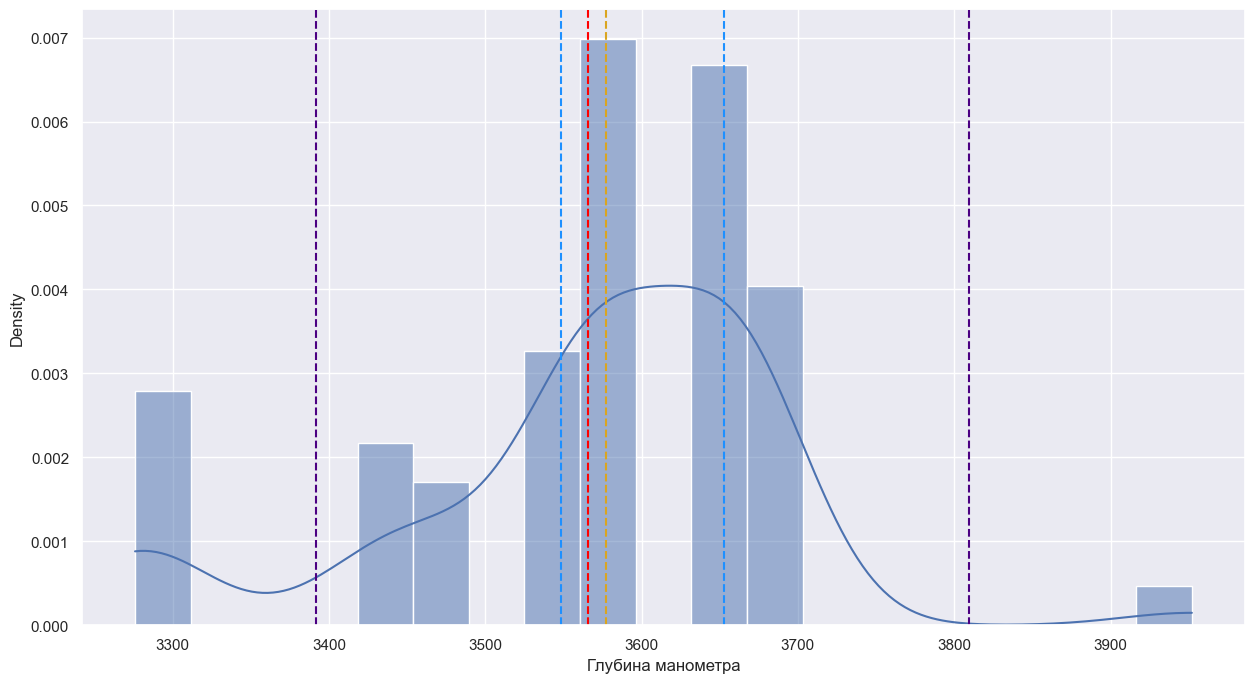

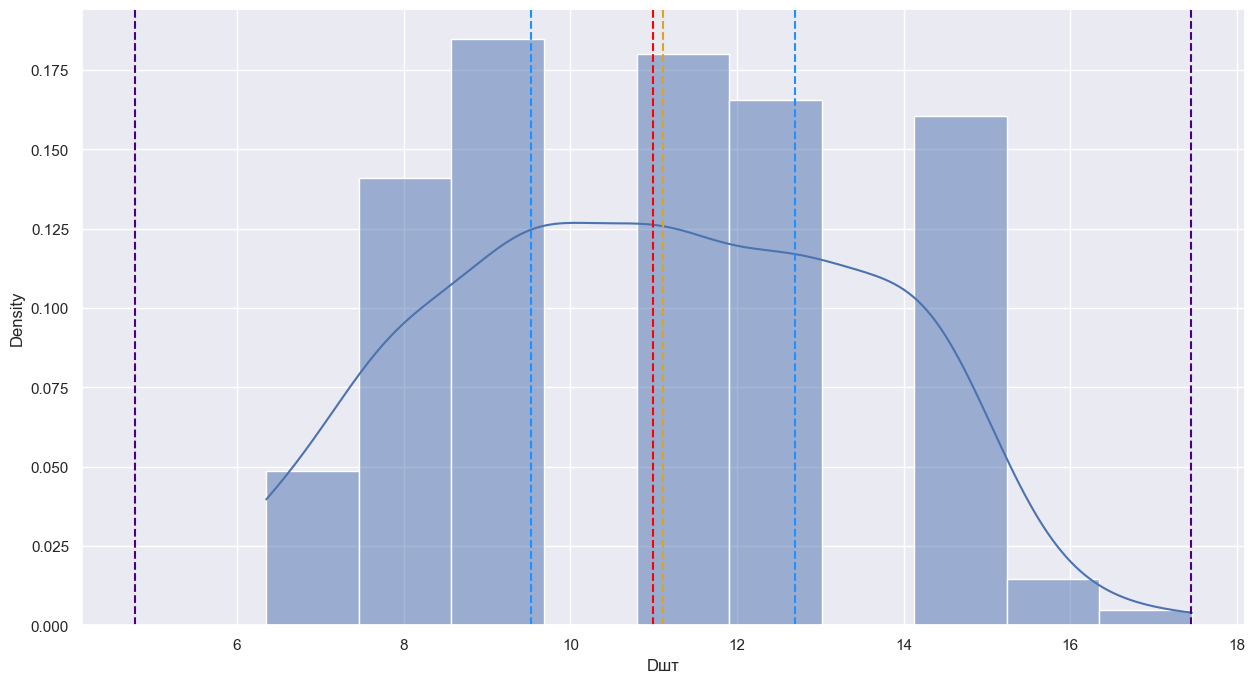

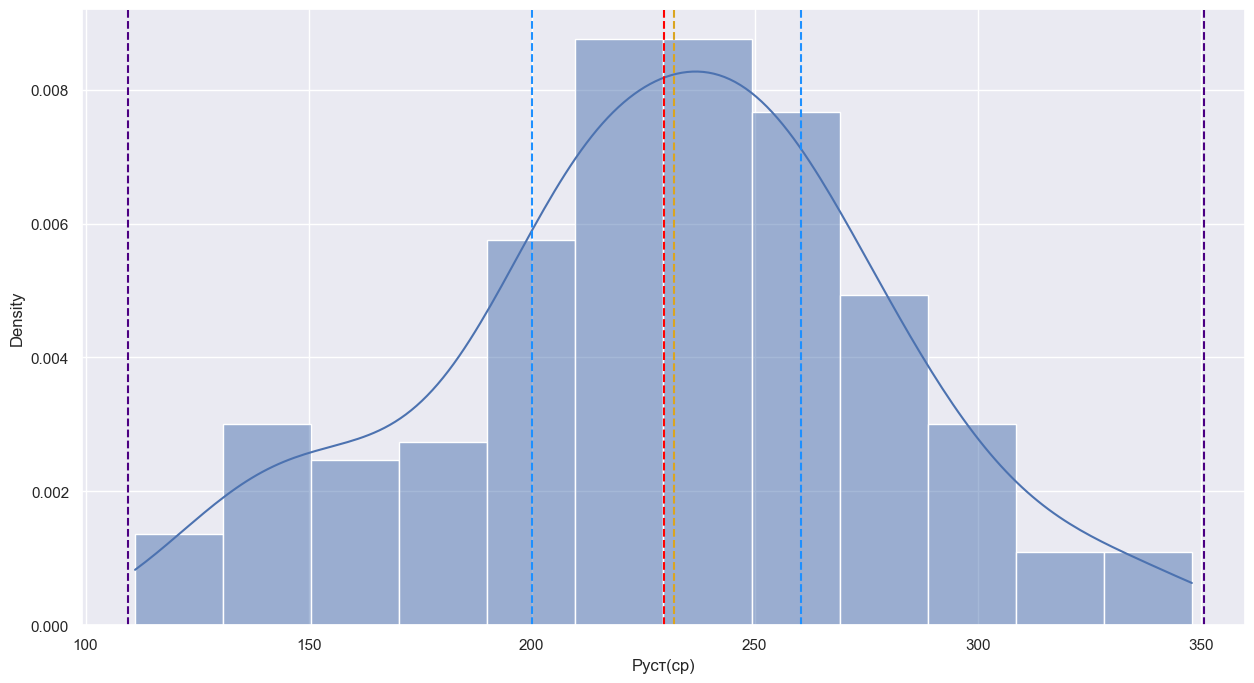

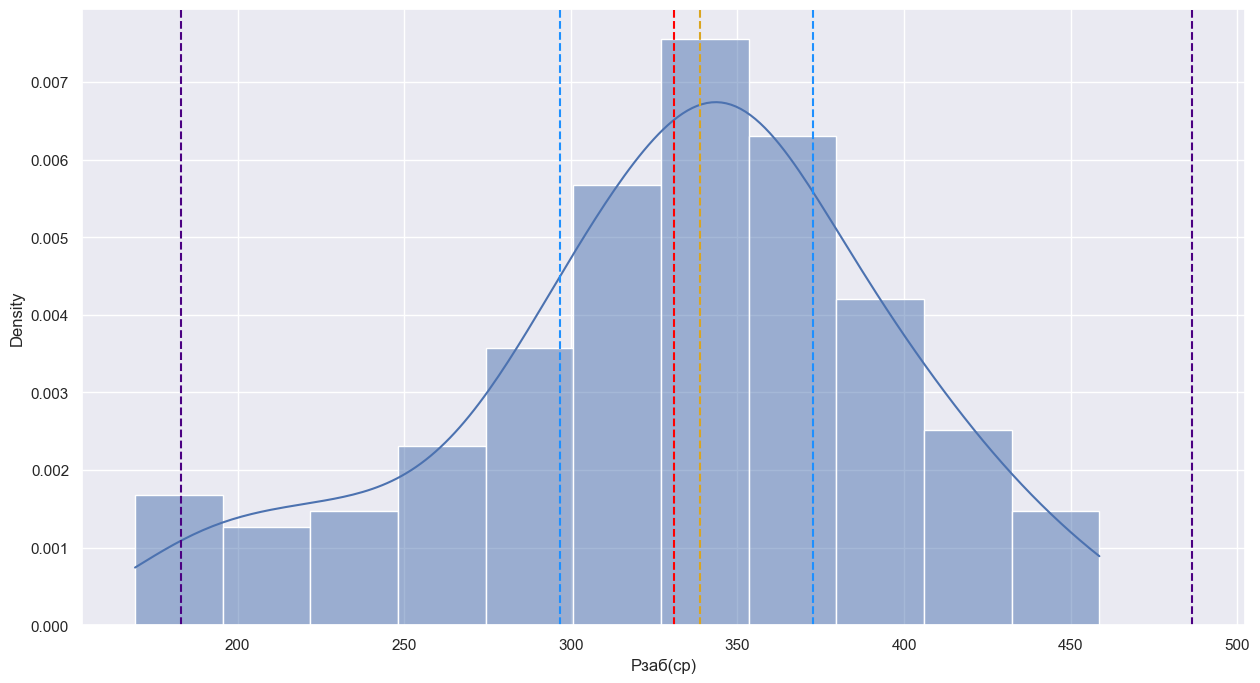

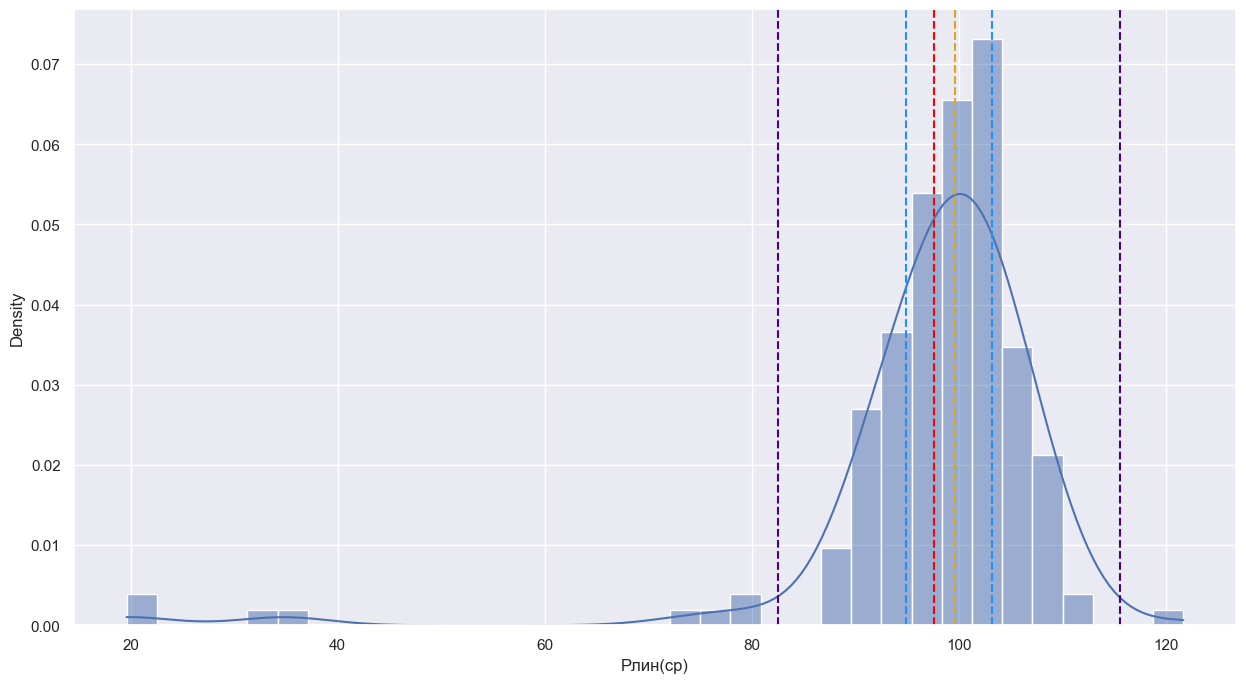

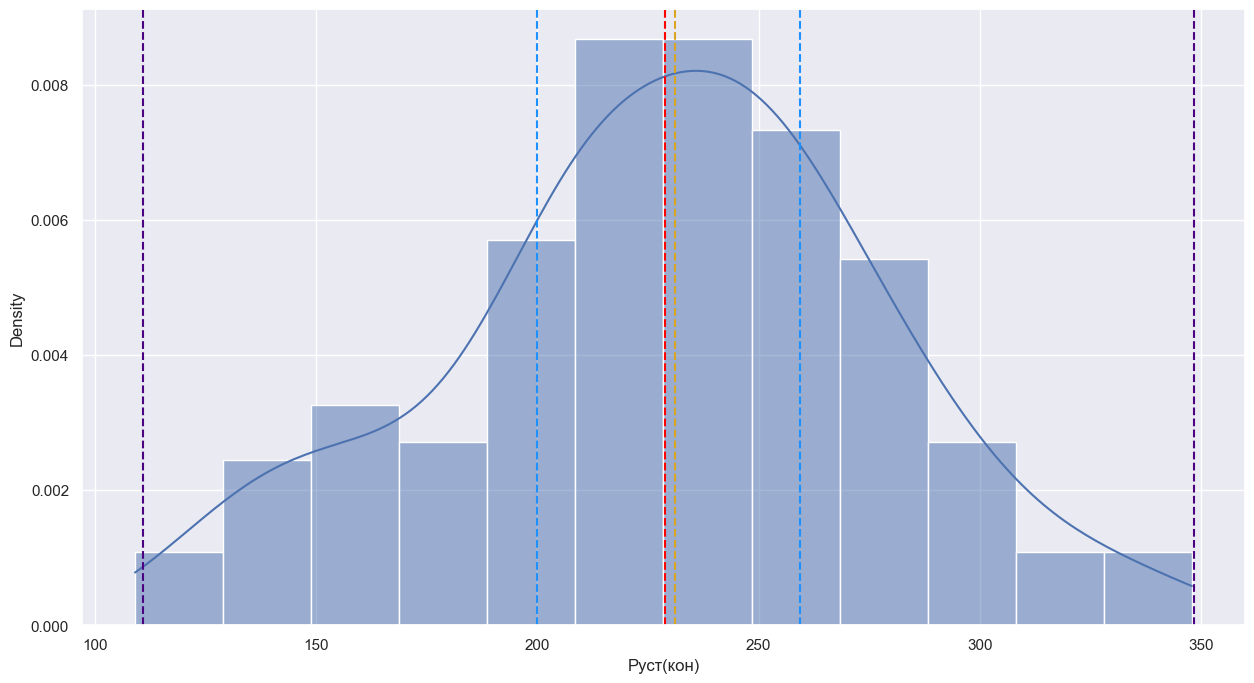

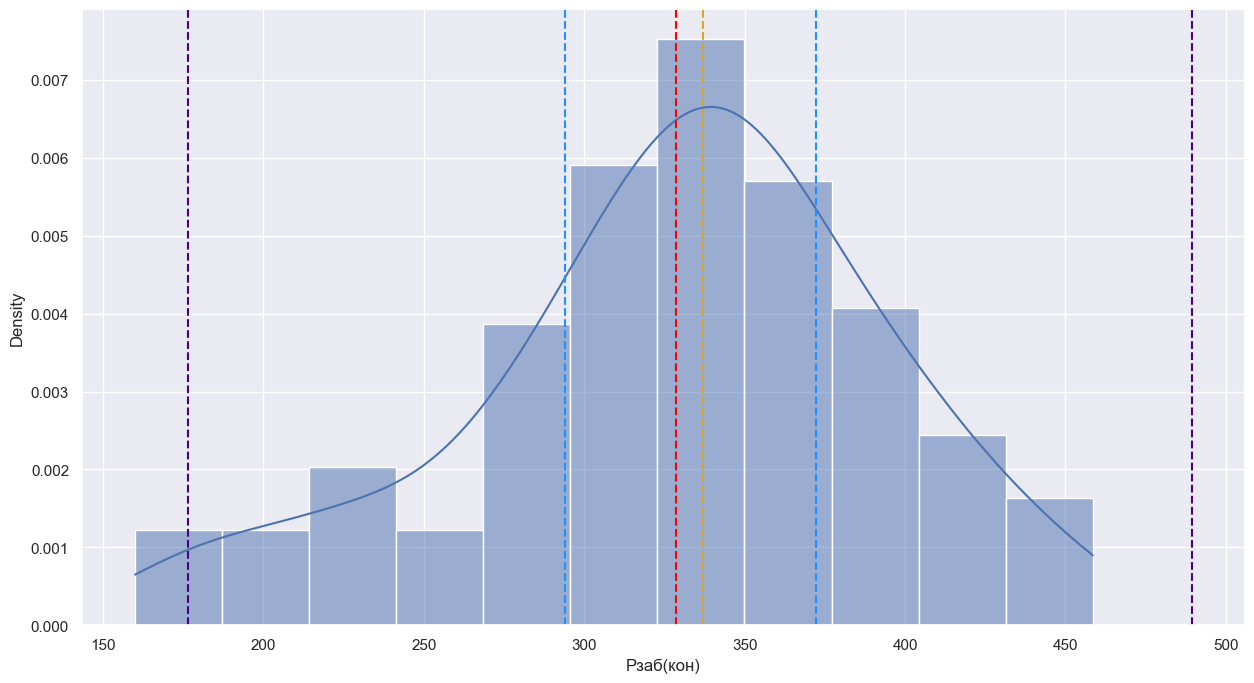

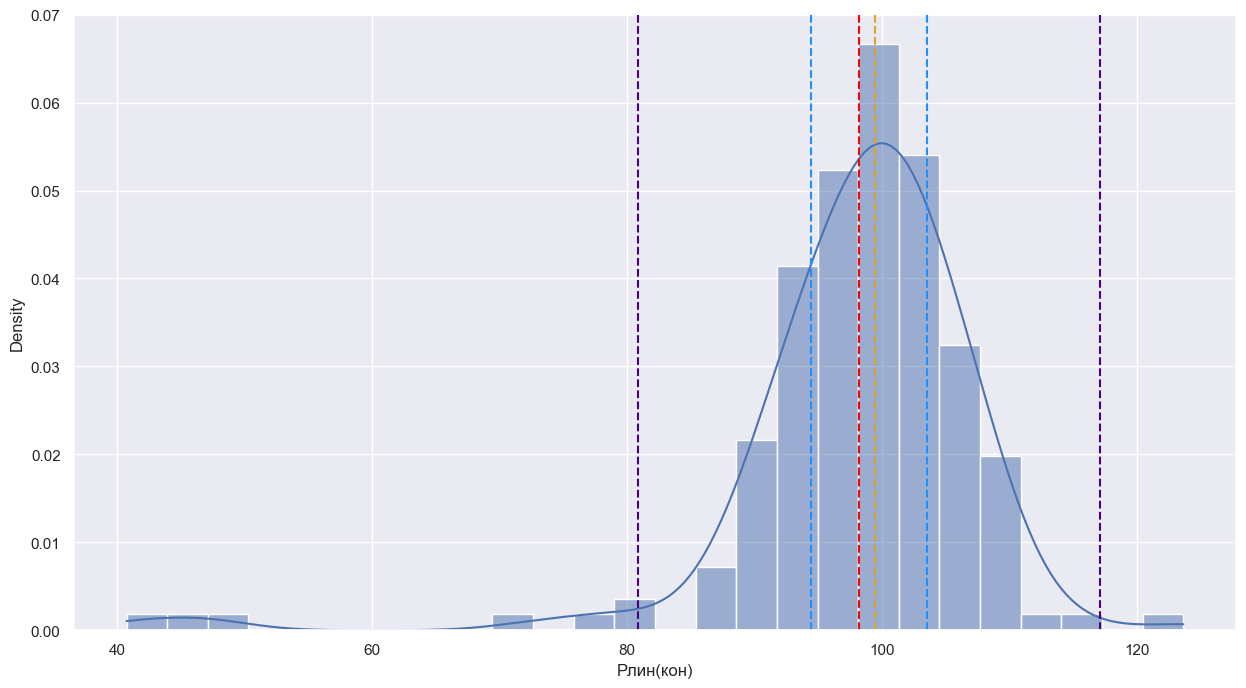

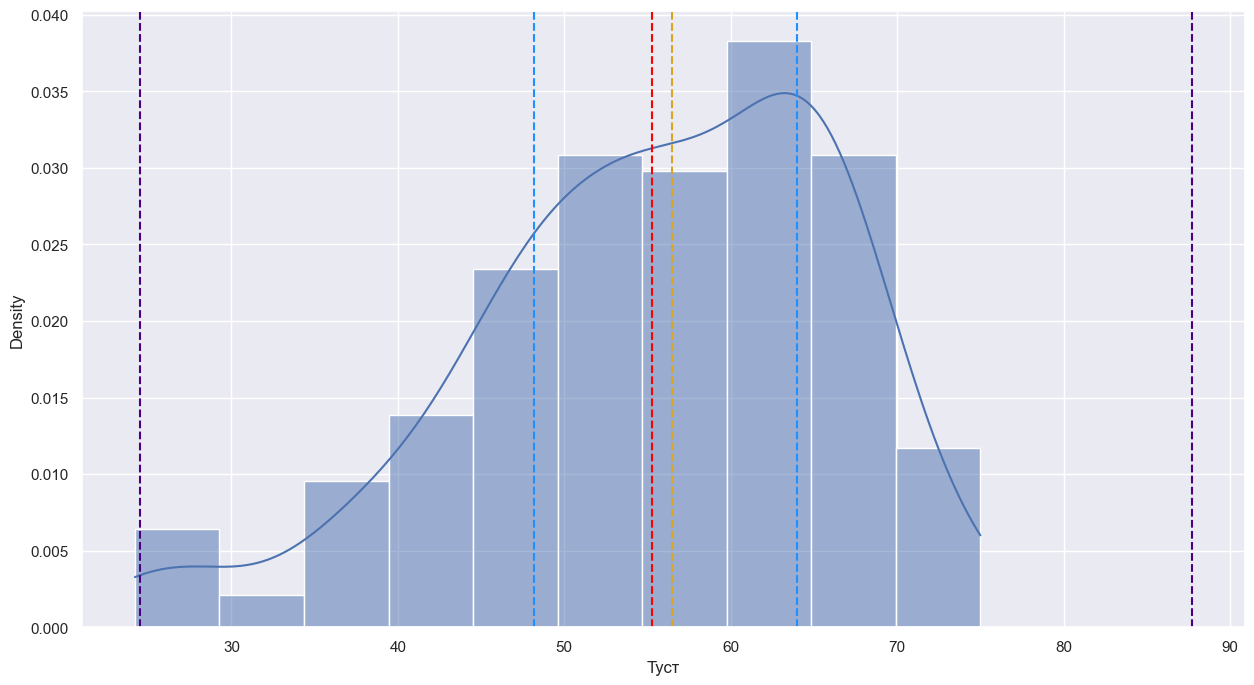

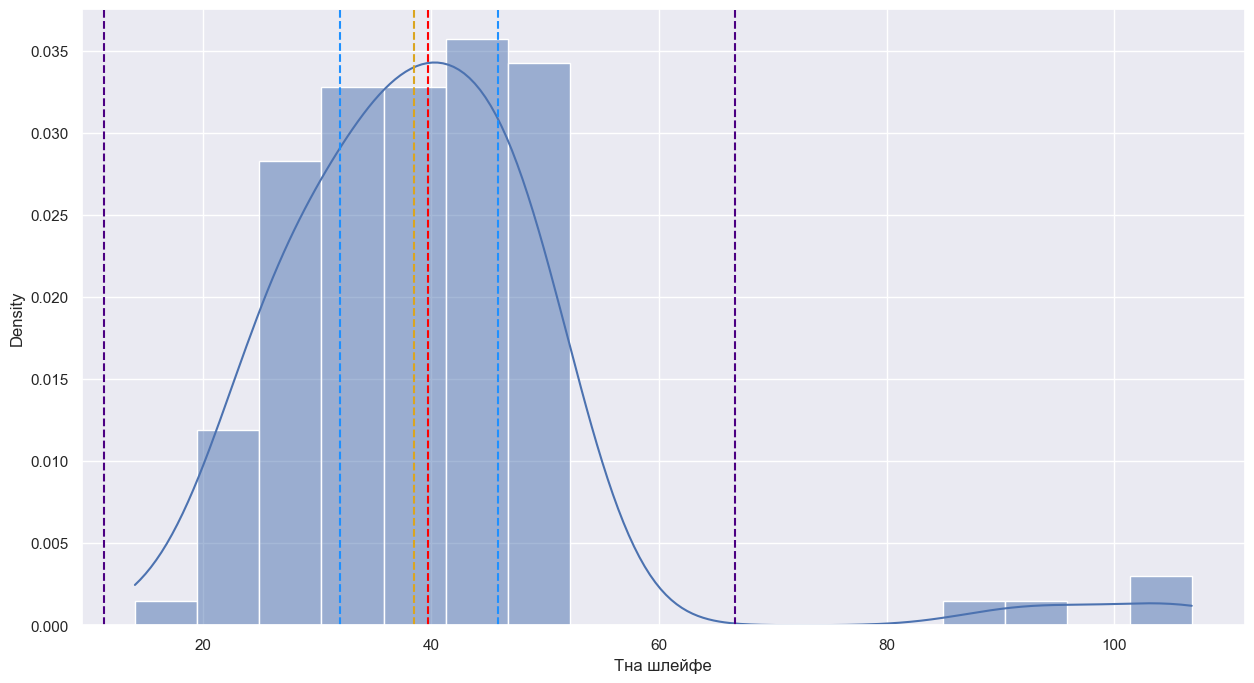

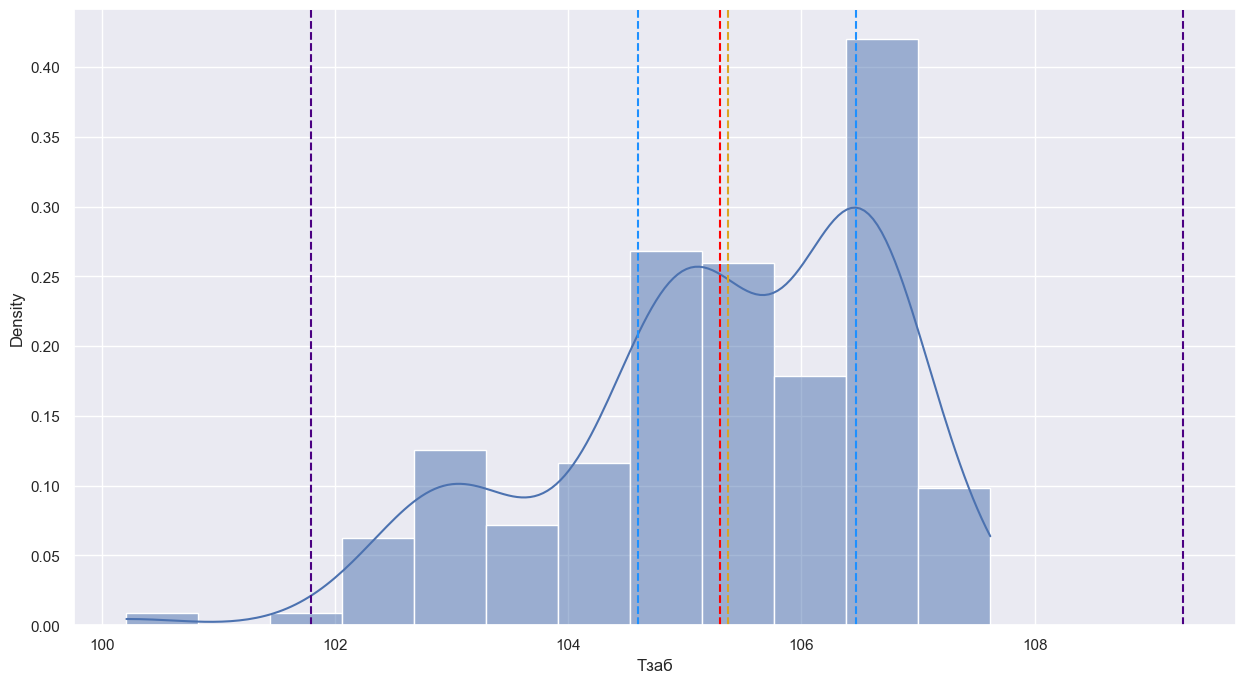

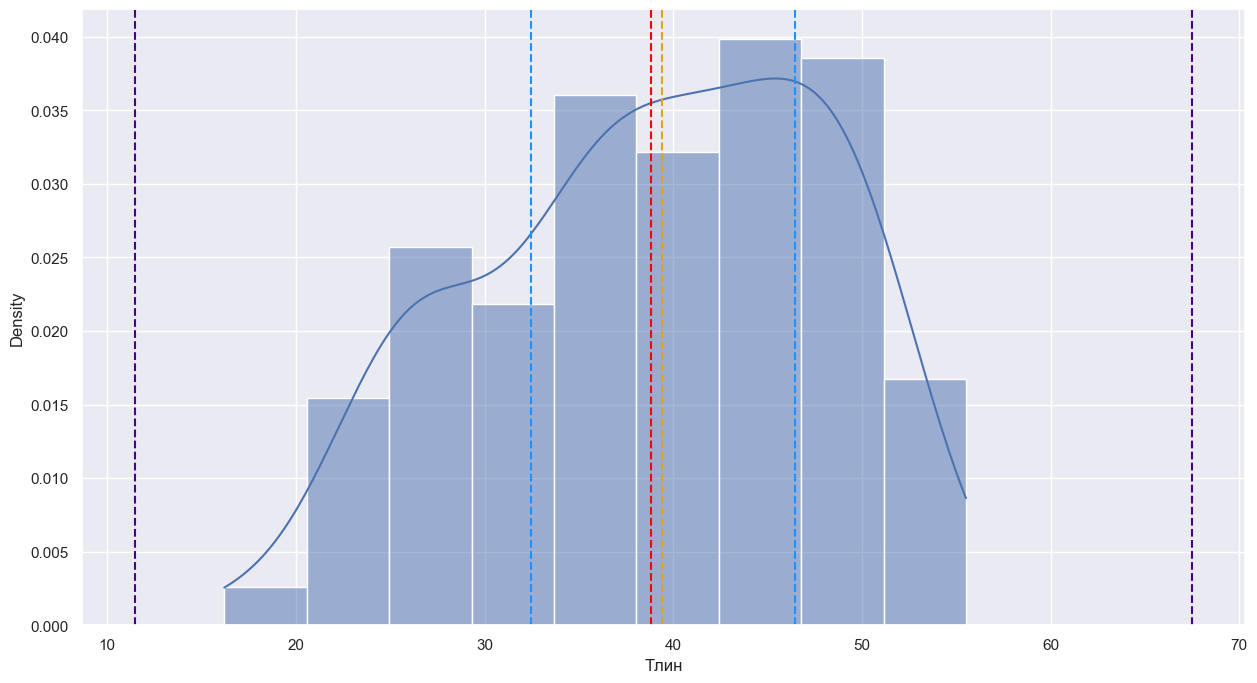

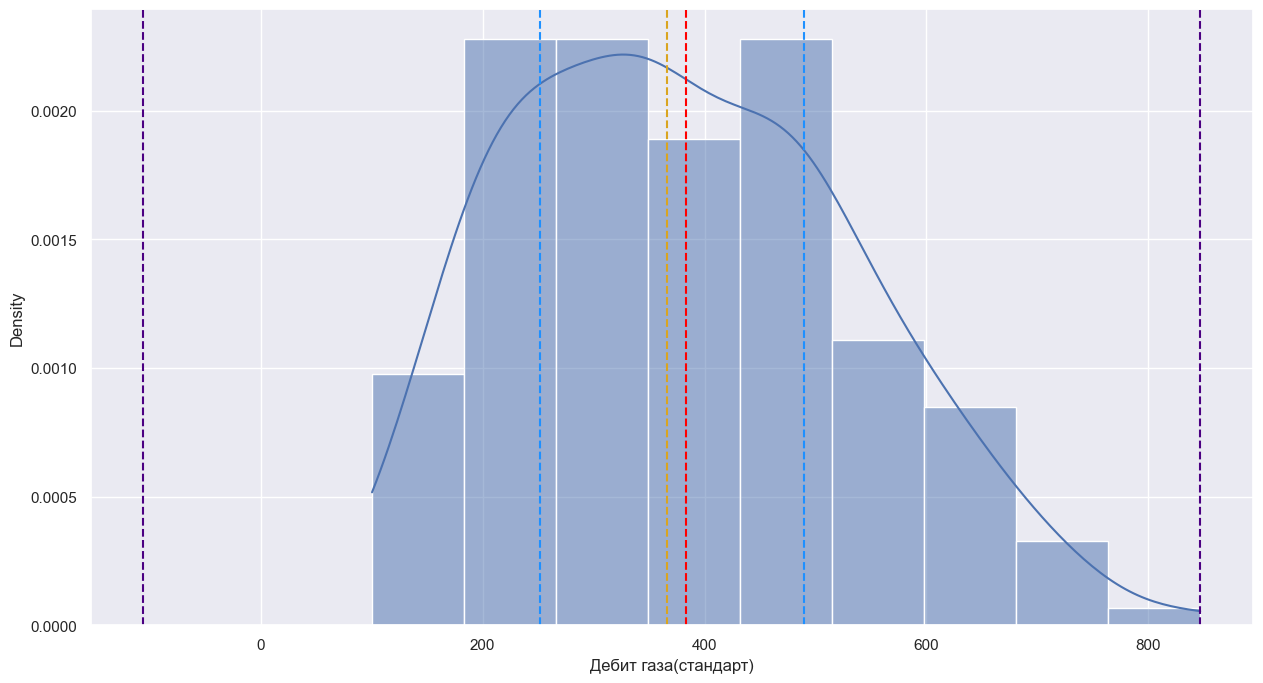

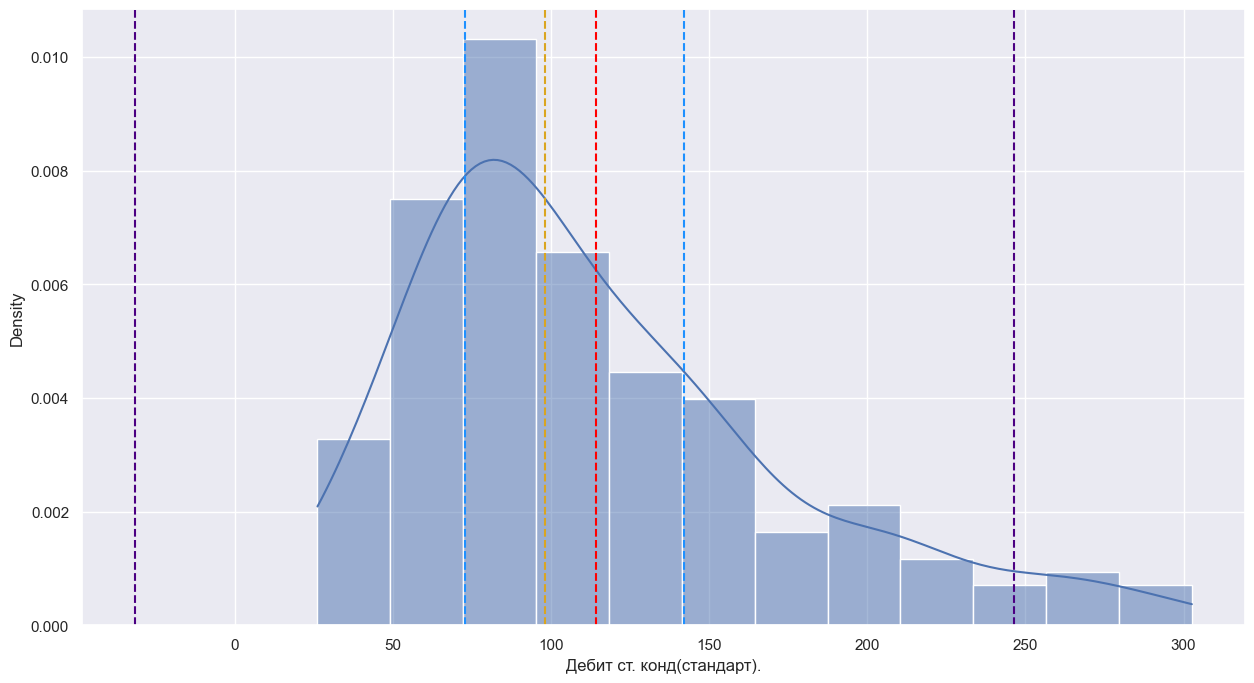

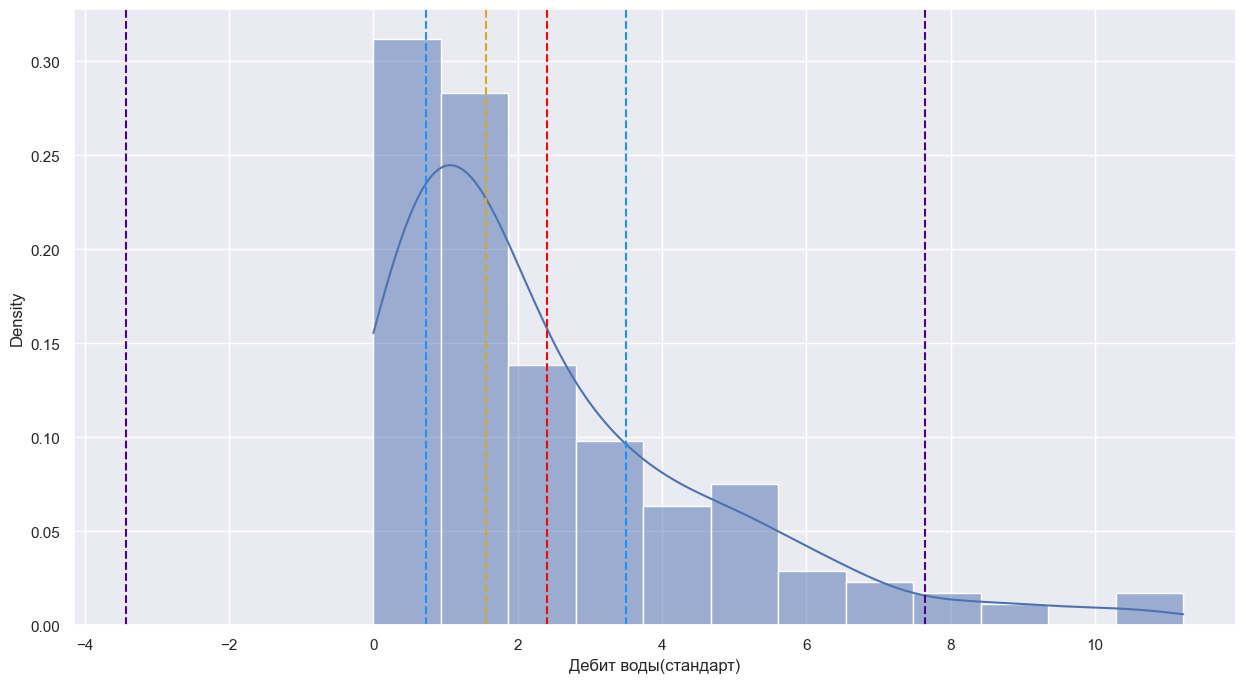

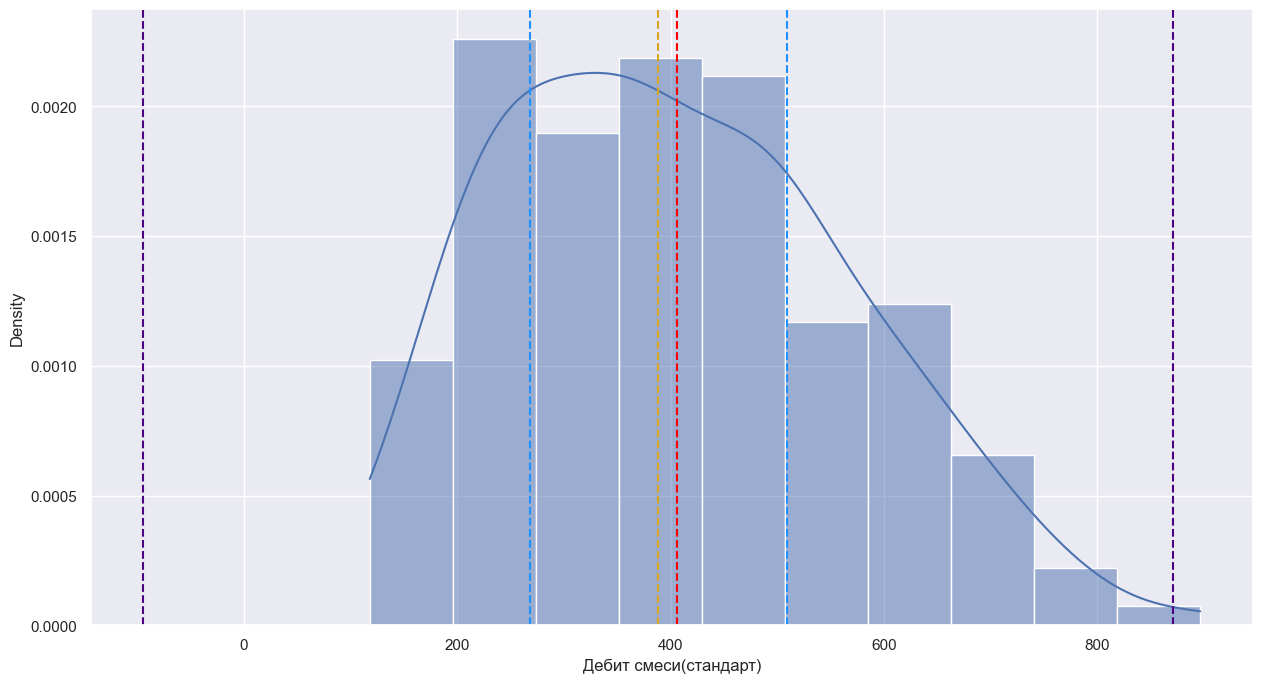

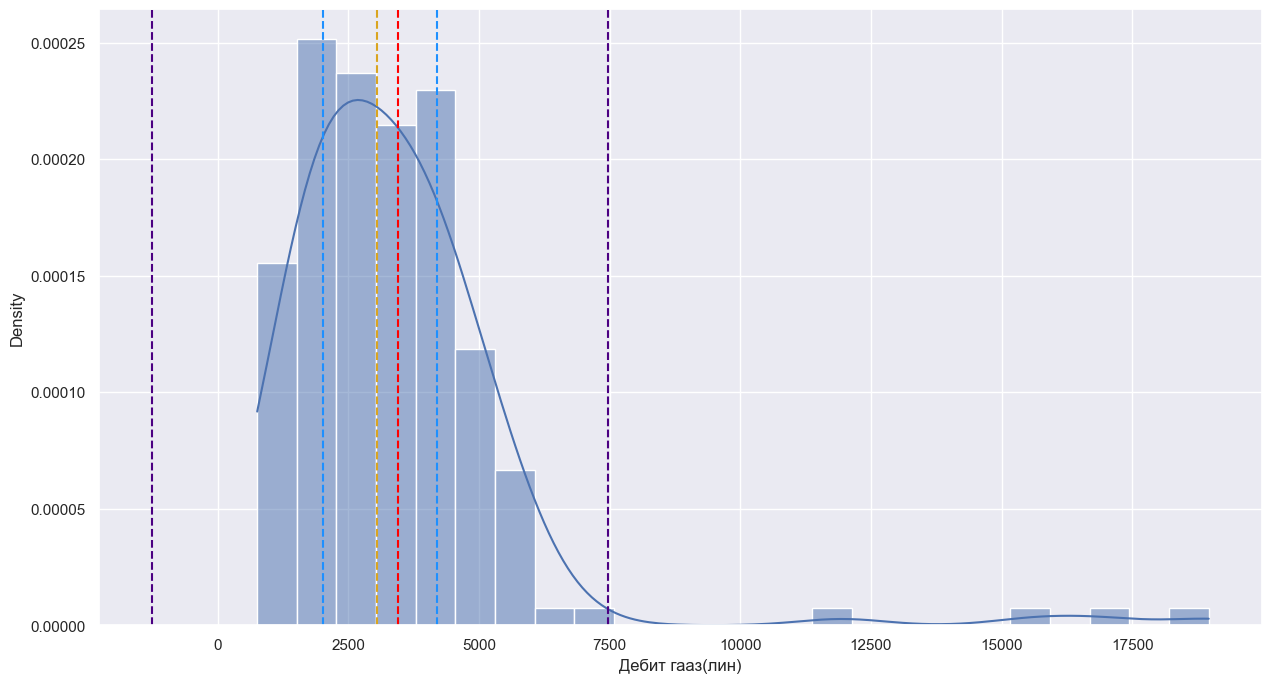

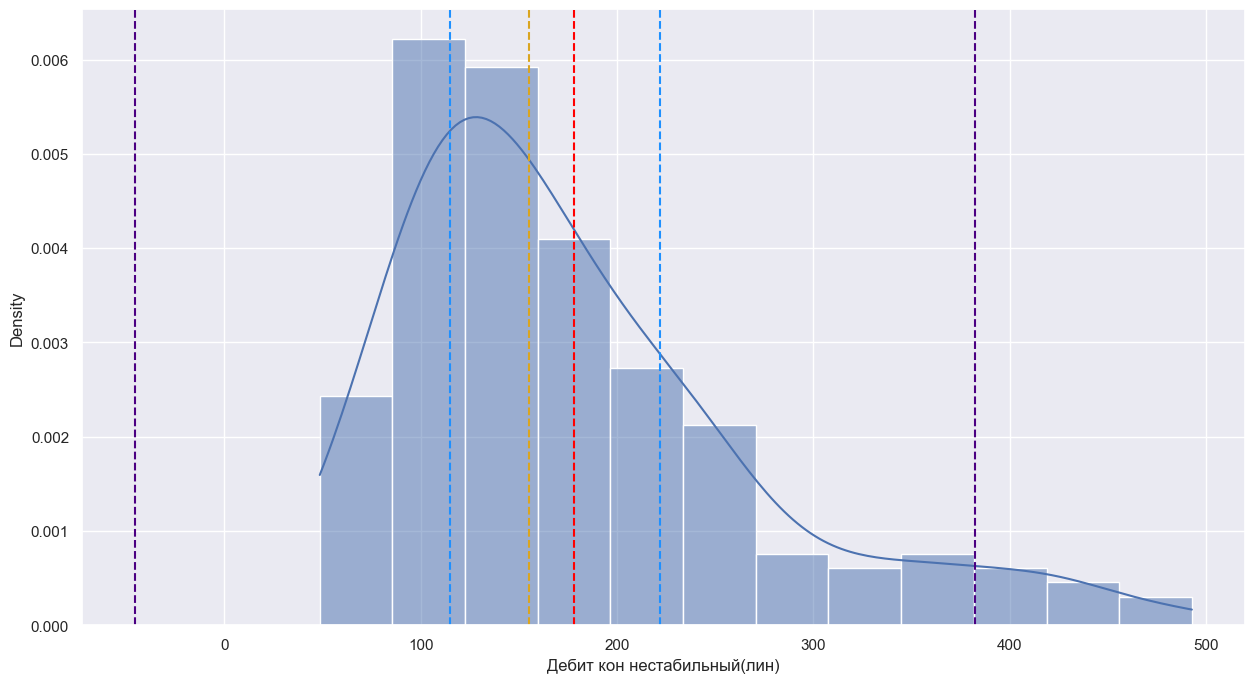

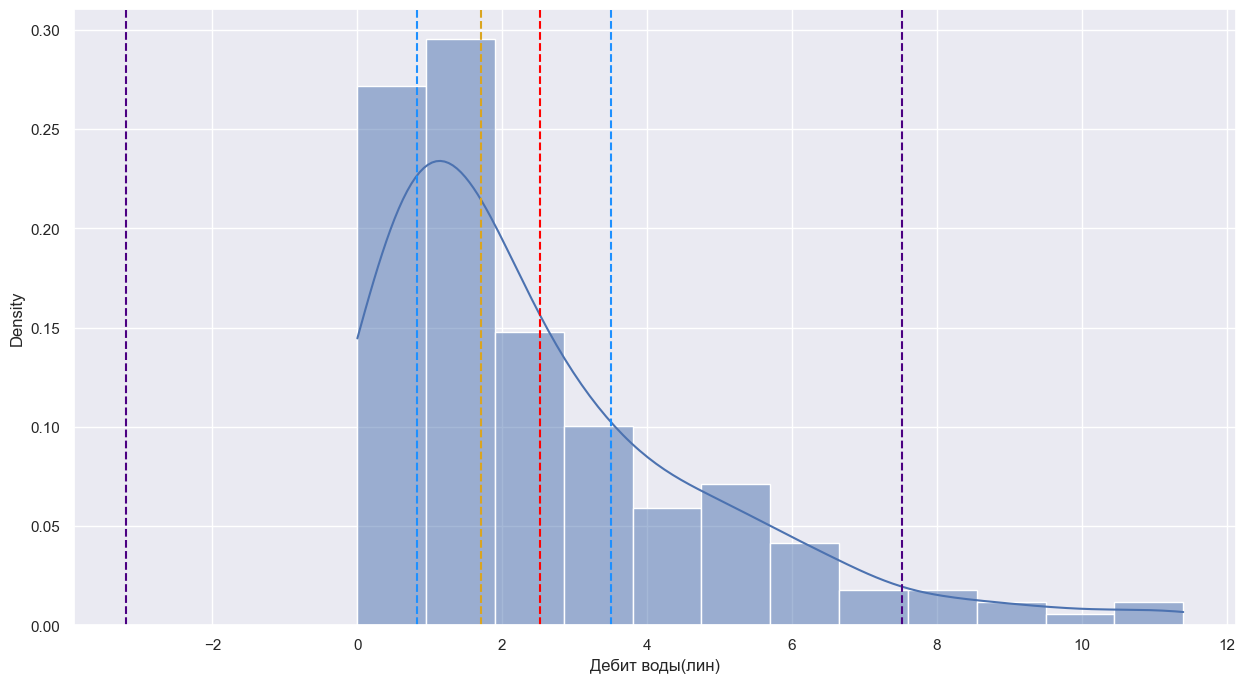

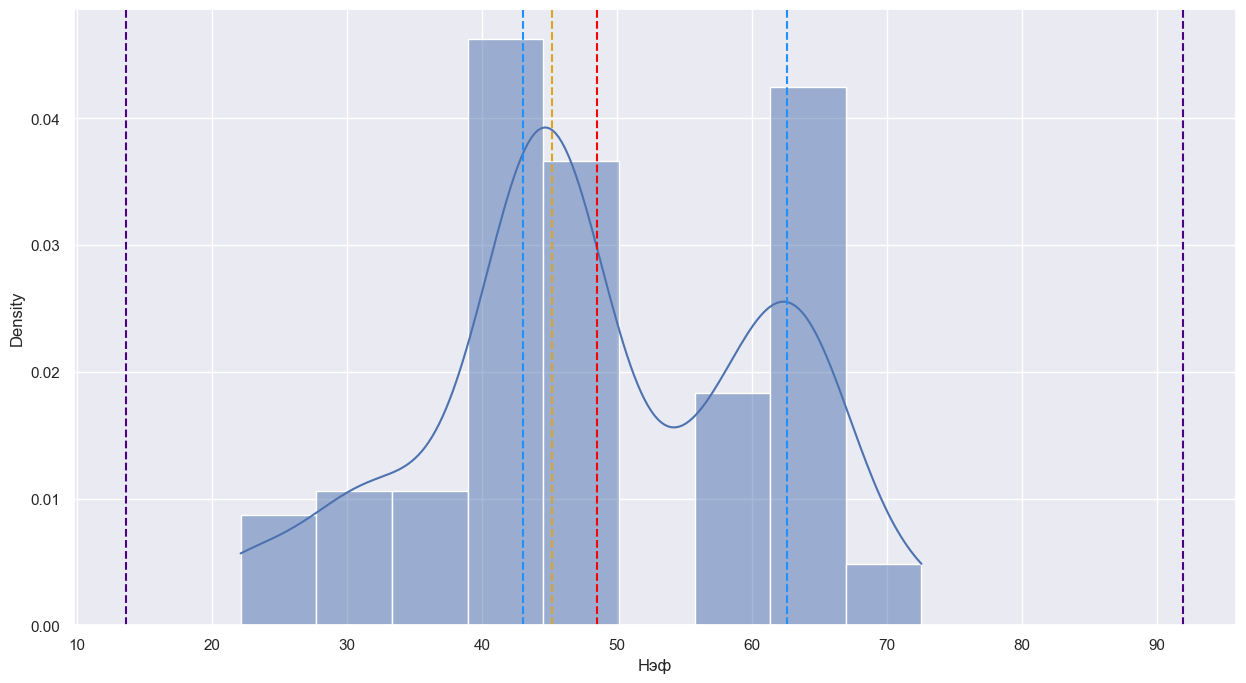

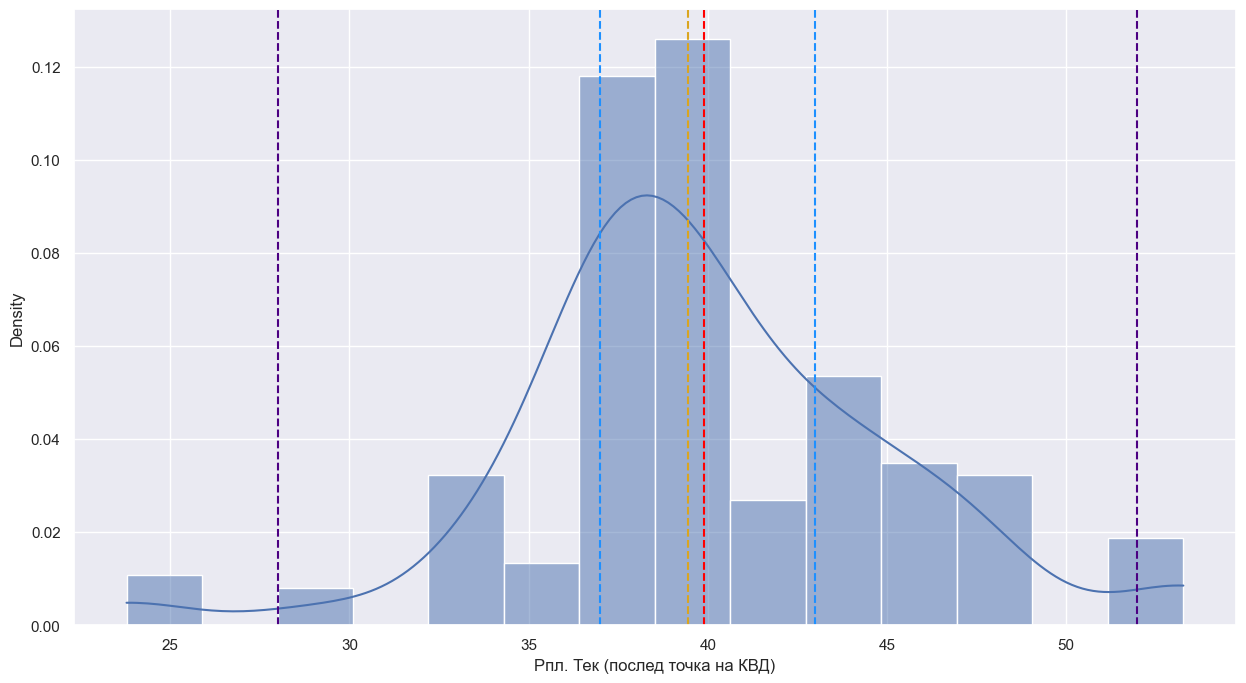

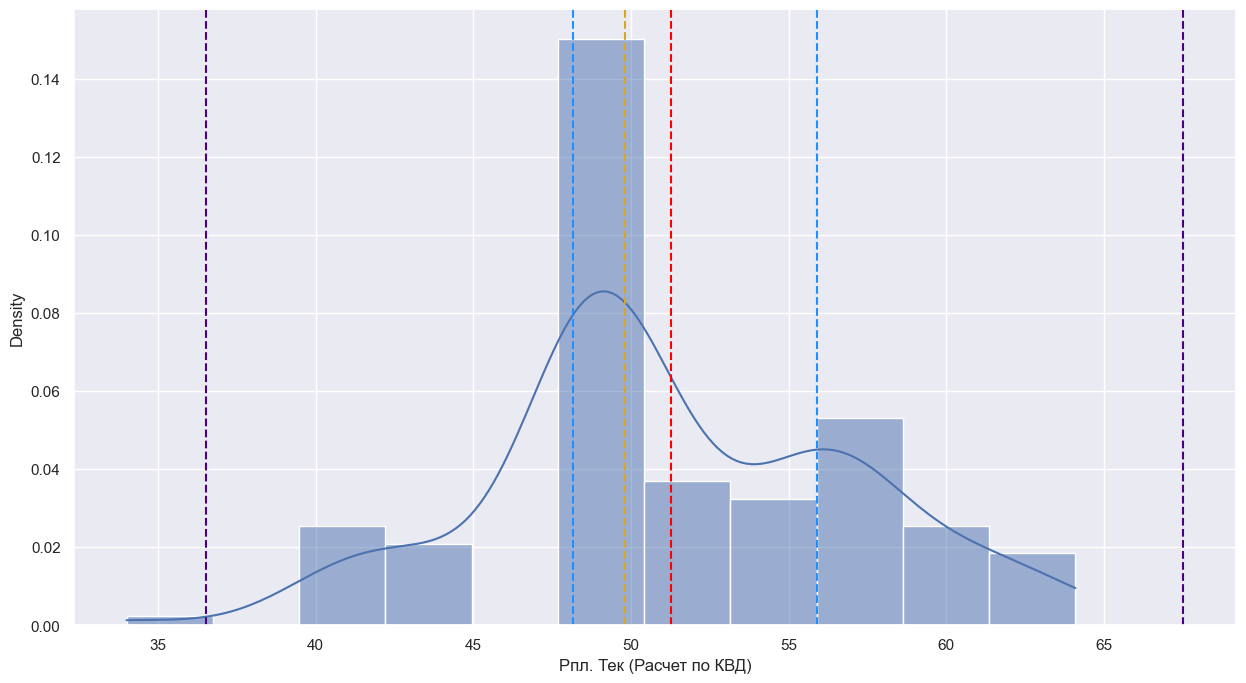

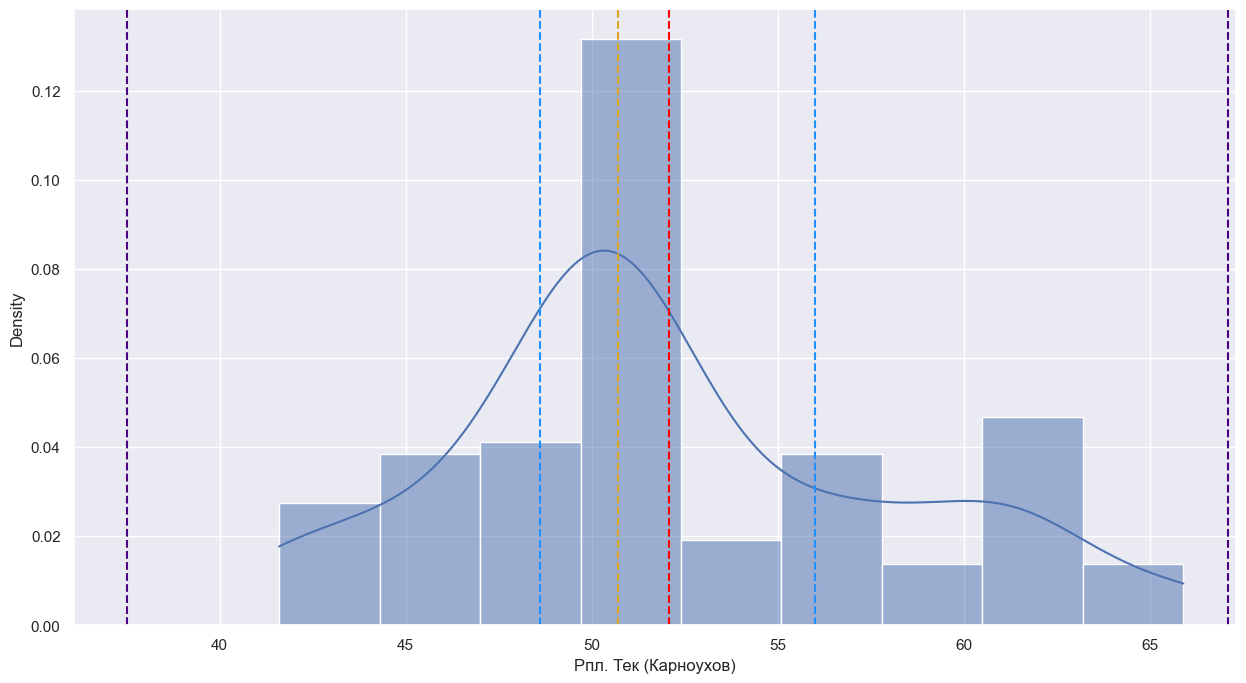

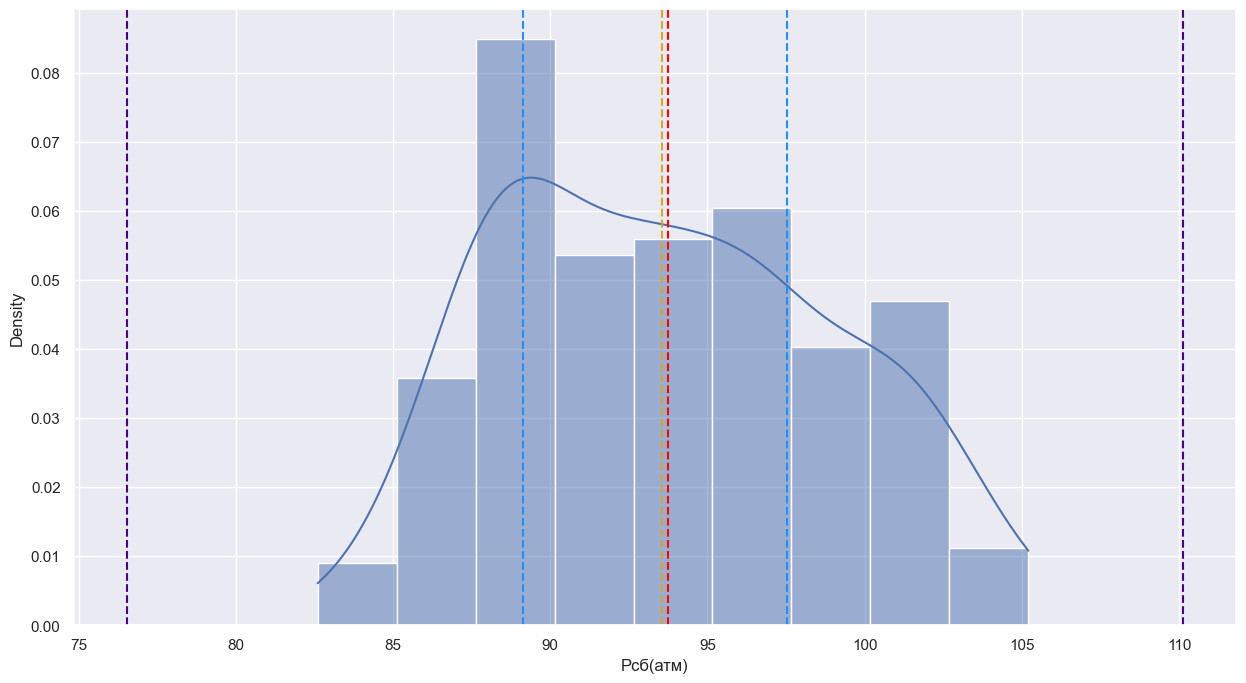

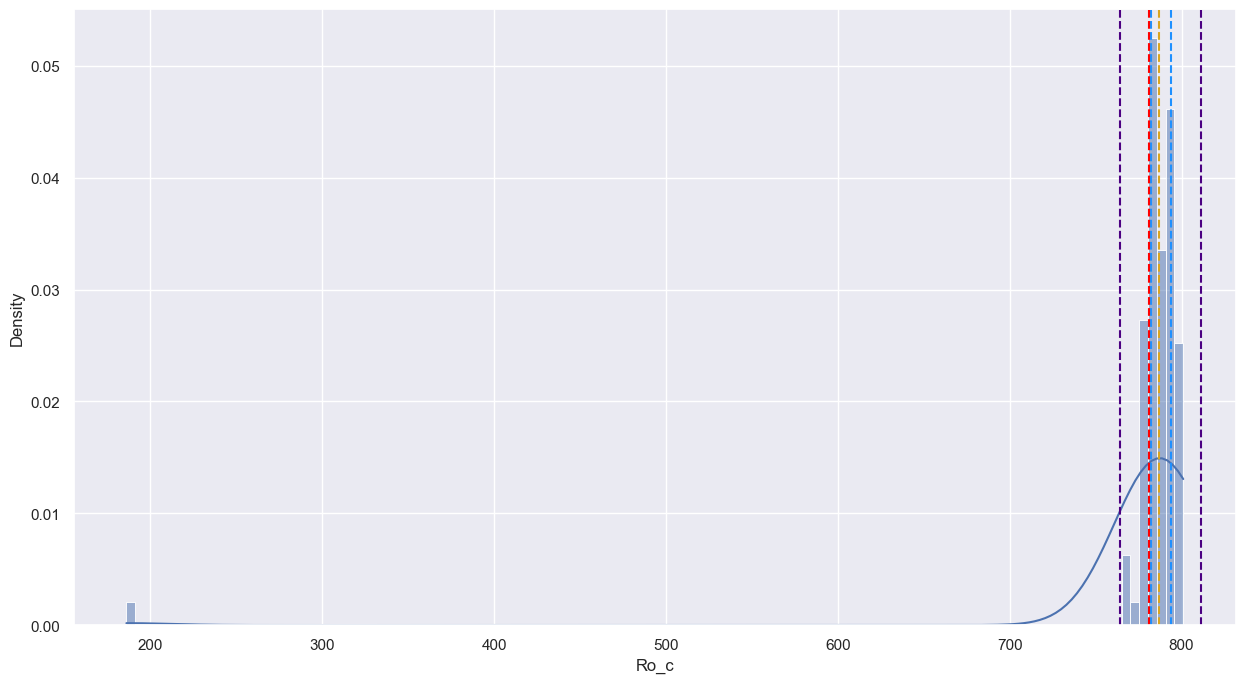

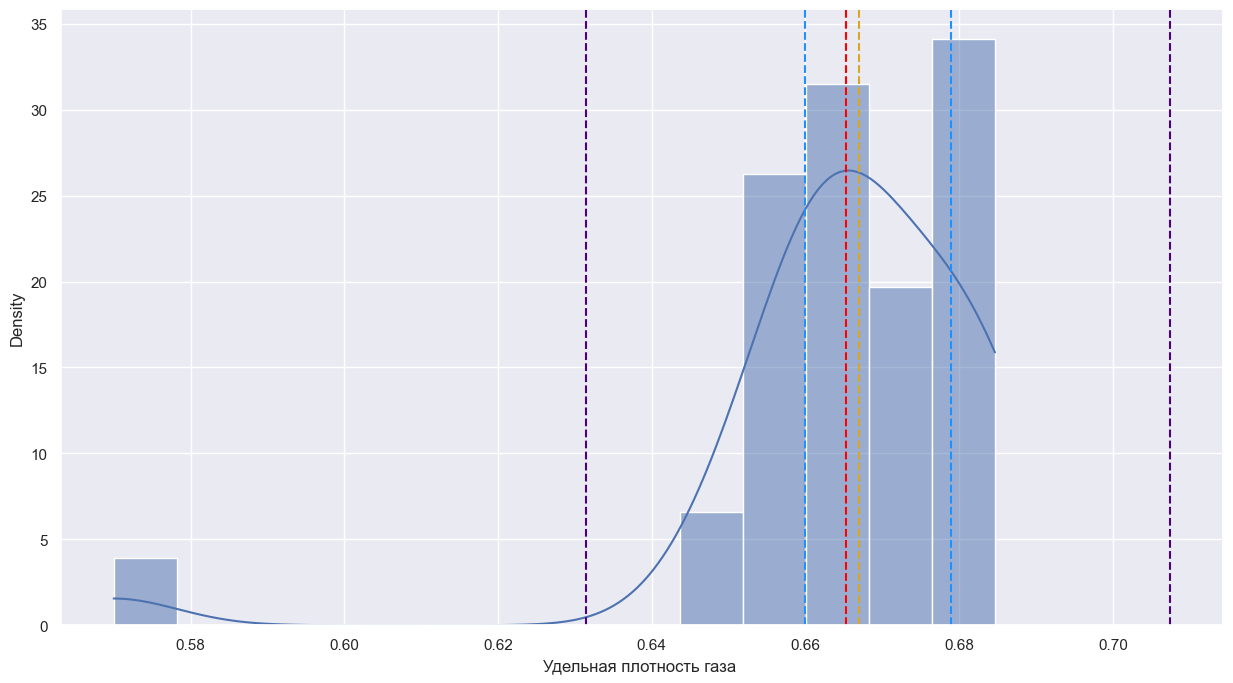

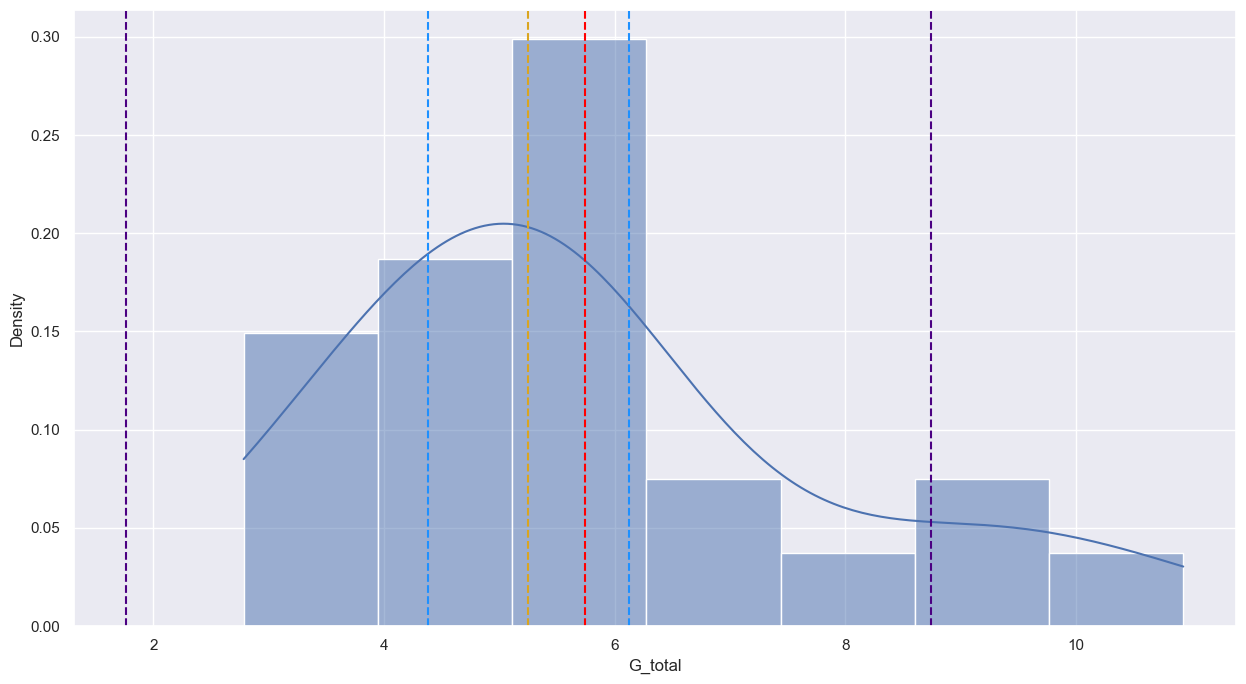

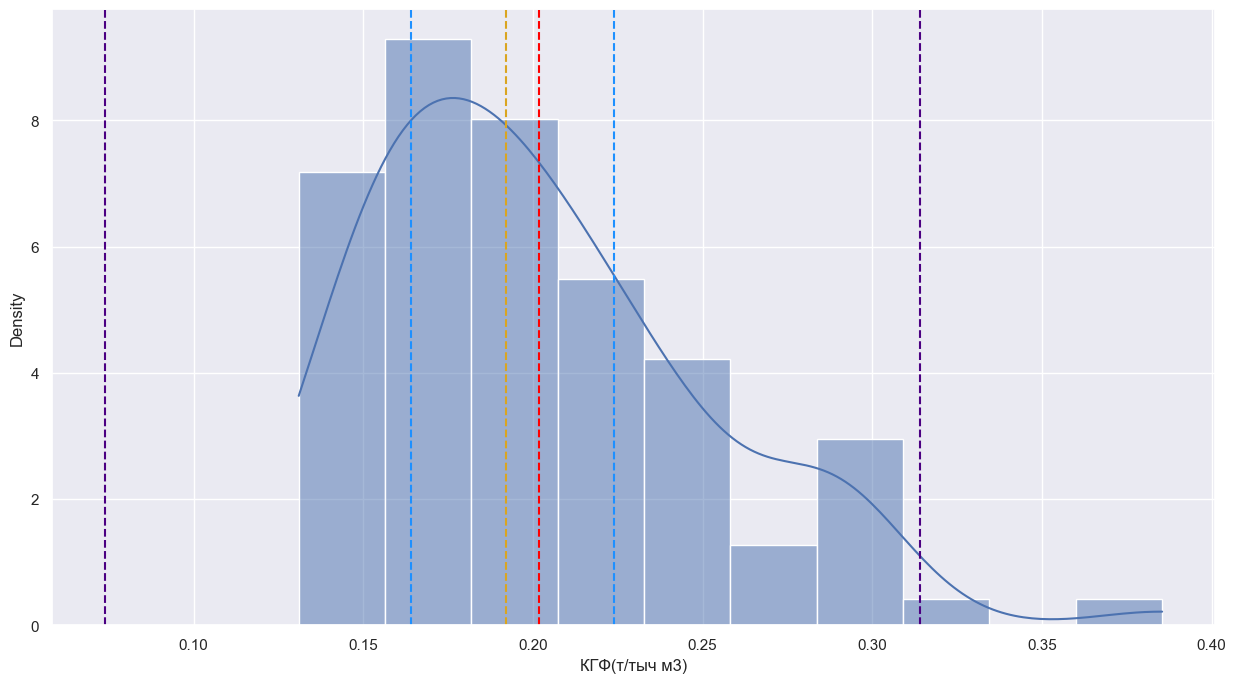

In [424]:
for i in df.columns:
    plt.figure(i)
    sns.histplot(df[i], kde=True, stat="density")
    plt.axvline(f.iloc[3][i] - 1.5 * f.iloc[10][i], color="indigo", ls='--')  #q1-1.5*iqr
    plt.axvline(f.iloc[3][i], color="dodgerblue", ls='--')  #первый квартиль
    plt.axvline(f.iloc[4][i], color="red", ls='--')  #среднее
    plt.axvline(f.iloc[5][i], color="goldenrod", ls='--')  #медиана
    plt.axvline(f.iloc[6][i], color="dodgerblue", ls='--')  #третий квартиль
    plt.axvline(f.iloc[6][i] + 1.5 * f.iloc[10][i], color="indigo", ls='--')  #q3+1.5*iqr
    plt.show()

У признака "Удельная плотность газа" пороги слишком далекие, что лишний раз иллюстрирует, что отсекать через интерквартильный размах можно только при близком к нормальному распределении. Однозначно сказать, что слева наблюдается выброс нельзя из-за малого размера выборки. Это вполне может быть состояние потока со скважины.

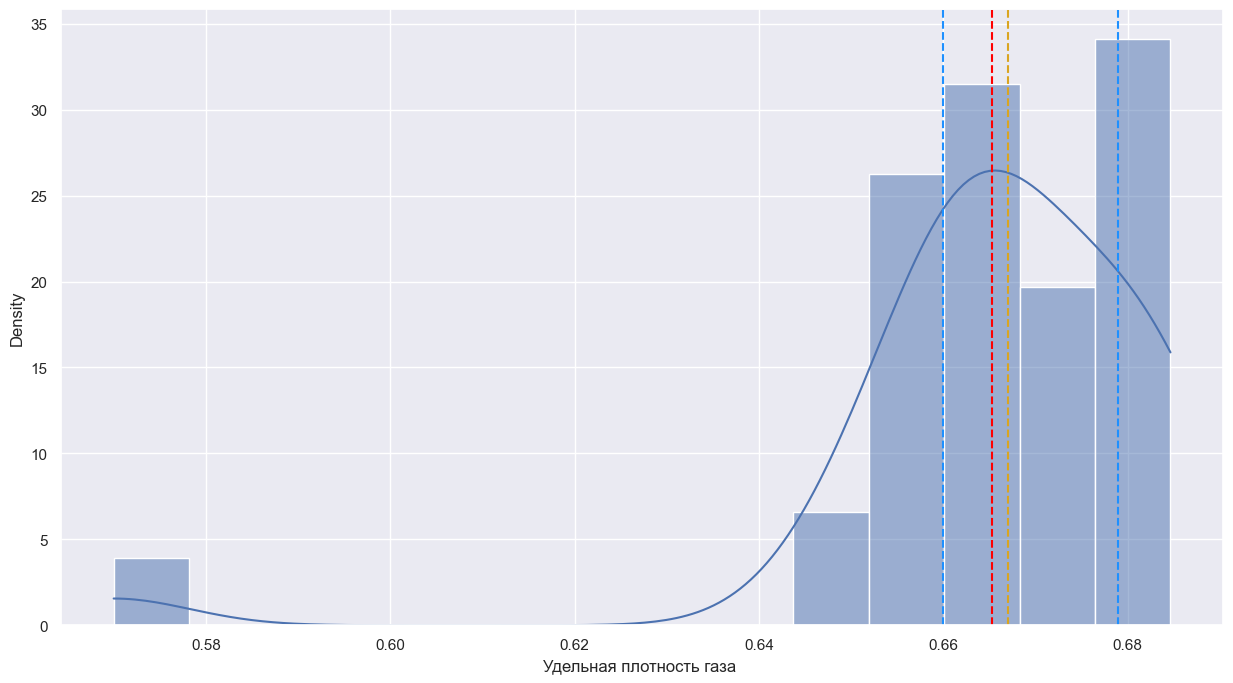

In [425]:
sns.histplot(df[df.columns[25]], kde=True, stat="density")
plt.axvline(f.iloc[3][df.columns[25]], color="dodgerblue", ls='--')  #первый квартиль
plt.axvline(f.iloc[4][df.columns[25]], color="red", ls='--')  #среднее
plt.axvline(f.iloc[5][df.columns[25]], color="goldenrod", ls='--')  #медиана
plt.axvline(f.iloc[6][df.columns[25]], color="dodgerblue", ls='--')  #третий квартиль

# Диаграммы рассеяния

Для target-параметра "Ro_c"

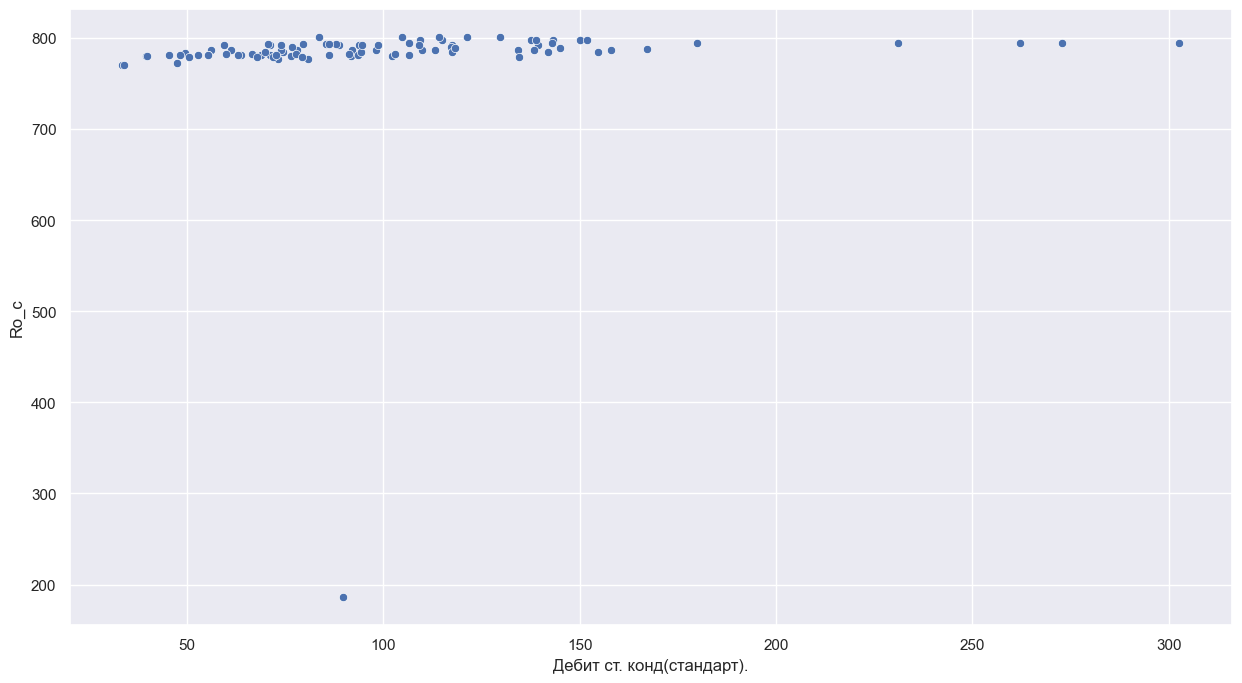

In [426]:
X1 = df.iloc[:, 0:23]

plt.figure(i)
sns.scatterplot(data=df, y="Ro_c", x="Дебит ст. конд(стандарт).")
plt.show()

Для target-параметра "КГФ(т/тыч м3)"

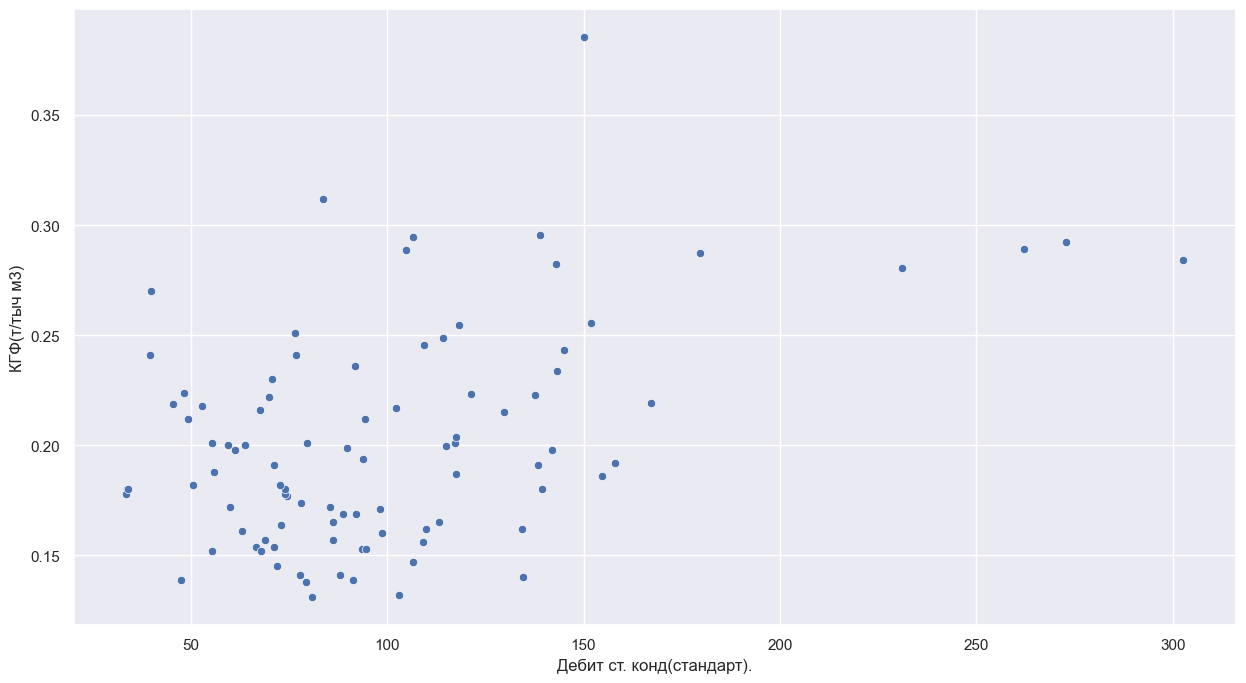

In [427]:
X1 = df.iloc[:, 0:23]

plt.figure(i)
sns.scatterplot(data=df, y="КГФ(т/тыч м3)", x="Дебит ст. конд(стандарт).")
plt.show()

Для target-параметра "Удельная плотность газа"

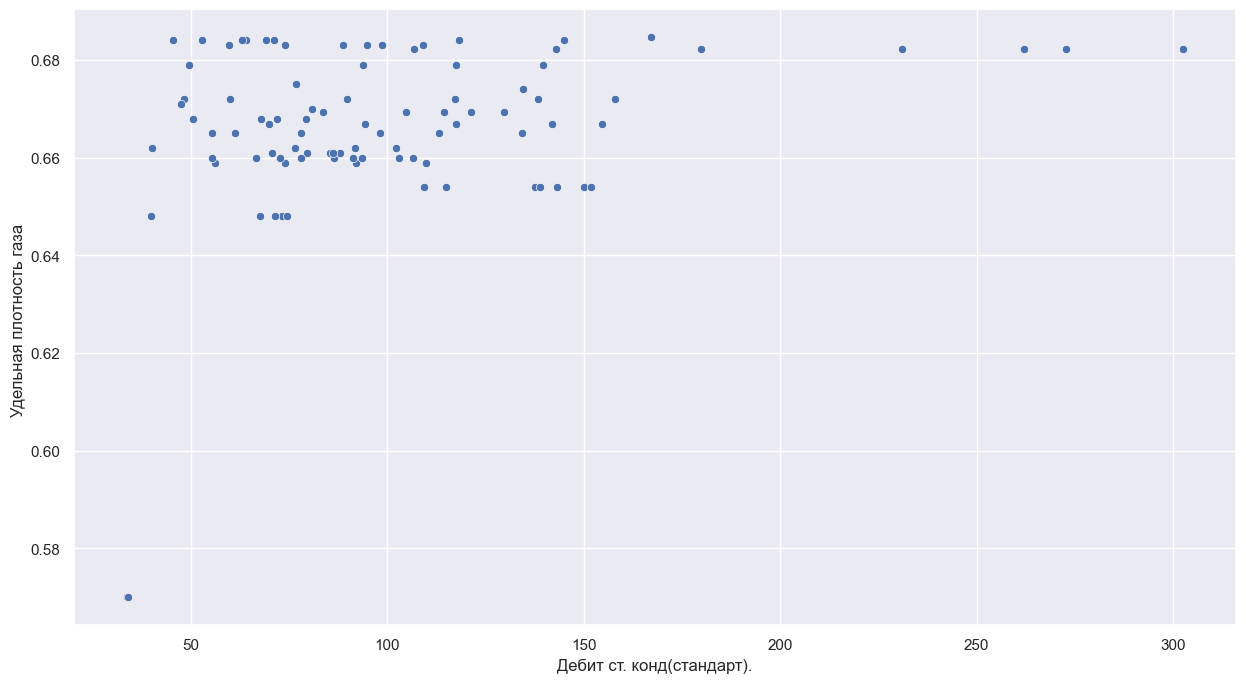

In [428]:
X1 = df.iloc[:, 0:23]

plt.figure(i)
sns.scatterplot(data=df, y="Удельная плотность газа ", x="Дебит ст. конд(стандарт).")
plt.show()

# Фильтрация выбросов

Выберем признаки с выбросами:

| Признак                 | Левая граница | Правая граница |
|-------------------------|---------------|----------------|
| Ro_c                    | 300           | -              |
| Удельная плотность газа | 0.6           | -              |


In [429]:
df

,Глубина манометра,Dшт,Руст(ср),Рзаб(ср),Pлин(ср),Руст(кон),Рзаб(кон),Рлин(кон),Туст,Тна шлейфе,Тзаб,Tлин,Дебит газа(стандарт),Дебит ст. конд(стандарт).,Дебит воды(стандарт),Дебит смеси(стандарт),Дебит гааз(лин),Дебит кон нестабильный(лин),Дебит воды(лин),Нэф,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб(атм),Ro_c,Удельная плотность газа,G_total,КГФ(т/тыч м3)
0,3590.0,17.46,209.641425,346.192061,NaN,209.641425,346.192061,NaN,65.0,NaN,103.300,NaN,692.600000,202.700000,1.200000,712.617222,NaN,NaN,NaN,57.2000,41.88000,52.3000,51.7,NaN,NaN,NaN,NaN,NaN
1,3590.0,14.28,245.510475,371.912399,NaN,245.510475,371.912399,NaN,63.0,NaN,103.000,NaN,569.700000,204.400000,0.800000,586.165220,NaN,NaN,NaN,57.2000,41.88000,52.3000,51.7,NaN,NaN,NaN,NaN,NaN
2,3590.0,11.11,270.943050,384.224400,NaN,270.943050,384.224400,NaN,56.0,NaN,102.900,NaN,341.500000,129.300000,0.100000,354.651203,NaN,NaN,NaN,57.2000,41.88000,52.3000,51.7,NaN,NaN,NaN,NaN,NaN
3,3590.0,7.93,284.317950,391.823775,NaN,284.317950,391.823775,NaN,46.0,NaN,102.800,NaN,198.900000,70.600000,0.000000,206.056016,NaN,NaN,NaN,57.2000,41.88000,52.3000,51.7,NaN,NaN,NaN,NaN,NaN
4,3952.0,14.30,259.392000,382.299225,NaN,259.392000,382.299225,NaN,55.7,NaN,107.100,NaN,581.300000,195.600000,0.400000,612.009600,NaN,NaN,NaN,45.2000,46.20000,55.9000,50.5,NaN,NaN,NaN,NaN,NaN
5,3952.0,11.11,275.705325,397.599300,NaN,275.705325,397.599300,NaN,56.5,NaN,107.200,NaN,378.500000,168.900000,0.300000,405.862100,NaN,NaN,NaN,45.2000,46.20000,55.9000,50.5,NaN,NaN,NaN,NaN,NaN
6,3952.0,7.94,289.485525,406.110600,NaN,289.485525,406.110600,NaN,39.5,NaN,107.400,NaN,202.100000,79.800000,0.000000,215.546300,NaN,NaN,NaN,45.2000,46.20000,55.9000,50.5,NaN,NaN,NaN,NaN,NaN
7,3672.3,14.29,213.795750,306.710775,106.114781,213.795750,318.300000,106.639850,47.0,NaN,106.300,51.147601,563.908914,165.694839,1.419921,588.995686,4511.000000,256.8,1.5,43.0000,43.98000,58.8000,65.9,105.206020,NaN,NaN,NaN,NaN
8,3672.3,6.35,282.696750,375.048408,106.175169,282.696750,372.100000,105.487540,25.0,NaN,106.600,24.156162,164.793903,47.629675,0.874894,171.675381,1047.000000,75.0,0.9,43.0000,43.98000,58.8000,65.9,104.613866,NaN,NaN,NaN,NaN
9,3672.3,9.53,268.511250,356.765325,106.421502,268.511250,354.600000,104.837070,47.0,NaN,106.800,36.774111,339.983963,100.069299,5.074245,354.420569,2422.000000,156.6,5.0,43.0000,43.98000,58.8000,65.9,104.416482,NaN,NaN,NaN,NaN


In [430]:
df[df['Ro_c'] < 300]

,Глубина манометра,Dшт,Руст(ср),Рзаб(ср),Pлин(ср),Руст(кон),Рзаб(кон),Рлин(кон),Туст,Тна шлейфе,Тзаб,Tлин,Дебит газа(стандарт),Дебит ст. конд(стандарт).,Дебит воды(стандарт),Дебит смеси(стандарт),Дебит гааз(лин),Дебит кон нестабильный(лин),Дебит воды(лин),Нэф,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб(атм),Ro_c,Удельная плотность газа,G_total,КГФ(т/тыч м3)
34,3277.8,9.53,282.69675,373.7,103.8,282.69675,379.6,103.5,39.0,NaN,106.4,40.1,354.224,89.8,3.2,373.31868,1192.0,82.6,0.8,44.5,40.35,53.9,52.7,100.172712,186.0,0.672,NaN,0.199


In [431]:
#Глубина манометра
df = df[(3400<df['Глубина манометра']) | df['Глубина манометра'].isna()]

#Pлин(ср)
df = df[(30<df['Pлин(ср)']) | df['Pлин(ср)'].isna() ]

#Ro_c
df = df[(df['Ro_c'] > 300) | df['Ro_c'].isna()]

#Удельная плотность газа
df = df[(df['Удельная плотность газа '] > 0.6) | df['Удельная плотность газа '].isna() ]

In [432]:
df

,Глубина манометра,Dшт,Руст(ср),Рзаб(ср),Pлин(ср),Руст(кон),Рзаб(кон),Рлин(кон),Туст,Тна шлейфе,Тзаб,Tлин,Дебит газа(стандарт),Дебит ст. конд(стандарт).,Дебит воды(стандарт),Дебит смеси(стандарт),Дебит гааз(лин),Дебит кон нестабильный(лин),Дебит воды(лин),Нэф,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб(атм),Ro_c,Удельная плотность газа,G_total,КГФ(т/тыч м3)
0,3590.0,17.46,209.641425,346.192061,NaN,209.641425,346.192061,NaN,65.0,NaN,103.300,NaN,692.600000,202.700000,1.200000,712.617222,NaN,NaN,NaN,57.2000,41.88000,52.3000,51.7,NaN,NaN,NaN,NaN,NaN
1,3590.0,14.28,245.510475,371.912399,NaN,245.510475,371.912399,NaN,63.0,NaN,103.000,NaN,569.700000,204.400000,0.800000,586.165220,NaN,NaN,NaN,57.2000,41.88000,52.3000,51.7,NaN,NaN,NaN,NaN,NaN
2,3590.0,11.11,270.943050,384.224400,NaN,270.943050,384.224400,NaN,56.0,NaN,102.900,NaN,341.500000,129.300000,0.100000,354.651203,NaN,NaN,NaN,57.2000,41.88000,52.3000,51.7,NaN,NaN,NaN,NaN,NaN
3,3590.0,7.93,284.317950,391.823775,NaN,284.317950,391.823775,NaN,46.0,NaN,102.800,NaN,198.900000,70.600000,0.000000,206.056016,NaN,NaN,NaN,57.2000,41.88000,52.3000,51.7,NaN,NaN,NaN,NaN,NaN
4,3952.0,14.30,259.392000,382.299225,NaN,259.392000,382.299225,NaN,55.7,NaN,107.100,NaN,581.300000,195.600000,0.400000,612.009600,NaN,NaN,NaN,45.2000,46.20000,55.9000,50.5,NaN,NaN,NaN,NaN,NaN
5,3952.0,11.11,275.705325,397.599300,NaN,275.705325,397.599300,NaN,56.5,NaN,107.200,NaN,378.500000,168.900000,0.300000,405.862100,NaN,NaN,NaN,45.2000,46.20000,55.9000,50.5,NaN,NaN,NaN,NaN,NaN
6,3952.0,7.94,289.485525,406.110600,NaN,289.485525,406.110600,NaN,39.5,NaN,107.400,NaN,202.100000,79.800000,0.000000,215.546300,NaN,NaN,NaN,45.2000,46.20000,55.9000,50.5,NaN,NaN,NaN,NaN,NaN
7,3672.3,14.29,213.795750,306.710775,106.114781,213.795750,318.300000,106.639850,47.0,NaN,106.300,51.147601,563.908914,165.694839,1.419921,588.995686,4511.000000,256.8,1.5,43.0000,43.98000,58.8000,65.9,105.206020,NaN,NaN,NaN,NaN
8,3672.3,6.35,282.696750,375.048408,106.175169,282.696750,372.100000,105.487540,25.0,NaN,106.600,24.156162,164.793903,47.629675,0.874894,171.675381,1047.000000,75.0,0.9,43.0000,43.98000,58.8000,65.9,104.613866,NaN,NaN,NaN,NaN
9,3672.3,9.53,268.511250,356.765325,106.421502,268.511250,354.600000,104.837070,47.0,NaN,106.800,36.774111,339.983963,100.069299,5.074245,354.420569,2422.000000,156.6,5.0,43.0000,43.98000,58.8000,65.9,104.416482,NaN,NaN,NaN,NaN


# Заполнение пропусков в выборке

Заполнение делаем для признаков, у которых, не более 30% пропусков
Заполнение делаем в двух вариациях:
- Если распределение признака похоже на нормальное распредление, то заполняем среднем значением
- В остальных случиях - медианой

Почти нормальные распредления:
 - Руст(ср)
 - Рзаб(ср)
 - Руст(кон)
 - Рзаб(кон)


In [433]:
df["Руст(ср)"] = df["Руст(ср)"].fillna(df["Руст(ср)"].mean())
df["Рзаб(ср)"] = df["Рзаб(ср)"].fillna(df["Рзаб(ср)"].mean())
df["Руст(кон)"] = df["Руст(кон)"].fillna(df["Руст(кон)"].mean())
df["Рзаб(кон)"] = df["Рзаб(кон)"].fillna(df["Рзаб(кон)"].mean())

df["Глубина манометра"] = df["Глубина манометра"].fillna(df["Глубина манометра"].median())
df["Pлин(ср)"] = df["Pлин(ср)"].fillna(df["Pлин(ср)"].median())
df["Рлин(кон)"] = df["Рлин(кон)"].fillna(df["Рлин(кон)"].median())
df["Тзаб"] = df["Тзаб"].fillna(df["Тзаб"].median())
df["Tлин"] = df["Tлин"].fillna(df["Tлин"].median())
df["Дебит смеси(стандарт)"] = df["Дебит смеси(стандарт)"].fillna(df["Дебит смеси(стандарт)"].median())
df["Дебит гааз(лин)"] = df["Дебит гааз(лин)"].fillna(df["Дебит гааз(лин)"].median())
df["Дебит кон нестабильный(лин)"] = df["Дебит кон нестабильный(лин)"].fillna(df["Дебит кон нестабильный(лин)"].median())
df["Дебит воды(лин)"] = df["Дебит воды(лин)"].fillna(df["Дебит воды(лин)"].median())
df["Рпл. Тек (послед точка на КВД)"] = df["Рпл. Тек (послед точка на КВД)"].fillna(
    df["Рпл. Тек (послед точка на КВД)"].median())
df["Рпл. Тек (Расчет по КВД)"] = df["Рпл. Тек (Расчет по КВД)"].fillna(df["Рпл. Тек (Расчет по КВД)"].median())
df["Рпл. Тек (Карноухов)"] = df["Рпл. Тек (Карноухов)"].fillna(df["Рпл. Тек (Карноухов)"].median())
df["Pсб(атм)"] = df["Pсб(атм)"].fillna(df["Pсб(атм)"].median())

# Важность признаков

Распечатаем текущую информацию о таблице

In [434]:
df.describe()

,Глубина манометра,Dшт,Руст(ср),Рзаб(ср),Pлин(ср),Руст(кон),Рзаб(кон),Рлин(кон),Туст,Тна шлейфе,Тзаб,Tлин,Дебит газа(стандарт),Дебит ст. конд(стандарт).,Дебит воды(стандарт),Дебит смеси(стандарт),Дебит гааз(лин),Дебит кон нестабильный(лин),Дебит воды(лин),Нэф,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб(атм),Ro_c,Удельная плотность газа,G_total,КГФ(т/тыч м3)
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,110.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,72.000000,72.000000,23.000000,72.000000
mean,3599.162346,11.101049,229.313265,332.139909,98.755097,228.397637,329.498933,98.422967,55.400000,40.075455,105.363068,38.964151,385.752475,118.117179,2.503382,408.331139,3337.781529,182.735185,2.597531,48.968036,40.325295,51.455793,52.296914,93.815539,789.037778,0.668849,5.742359,0.206634
std,85.186049,2.495502,50.530410,64.056320,9.565735,50.557357,65.260839,10.020160,10.976661,14.347440,1.390287,8.841651,151.600201,60.221506,2.350524,155.261554,1961.202894,91.861030,2.348621,13.093293,5.229766,5.170944,4.999247,5.245631,6.953995,0.011883,2.112717,0.053576
min,3424.500000,6.350000,111.100000,169.250000,34.162667,109.000000,160.000000,40.739839,24.200000,14.000000,100.210000,16.204686,100.300000,26.200000,0.000000,117.868700,755.630000,48.600000,0.000000,22.100000,23.780000,34.000000,42.100000,82.605477,776.700000,0.648000,2.782623,0.131000
25%,3560.000000,9.530000,199.625000,297.797500,96.503453,199.625000,295.225000,95.603508,48.300000,32.425000,104.610750,33.278571,262.537461,74.277317,0.746562,285.846653,2093.250000,118.250000,1.000000,41.350000,37.120000,48.400000,50.200000,89.130559,782.397500,0.660000,4.381813,0.162000
50%,3588.500000,11.110000,231.575158,338.214737,100.369642,229.500000,333.250000,100.080000,56.750000,38.500000,105.480000,39.507957,367.130469,101.340753,1.694266,388.184439,3043.000000,158.900000,1.800000,46.171750,39.492100,50.200000,50.900000,93.856403,788.900000,0.668000,5.250915,0.198814
75%,3653.000000,12.700000,261.426389,376.078883,103.167190,259.848000,372.950000,103.424678,64.000000,45.950000,106.495000,46.175000,490.184500,144.625079,3.580750,507.375256,4134.000000,222.450000,3.575000,63.300000,43.040000,55.400000,54.575000,97.285961,795.000000,0.682180,6.125723,0.241657
max,3952.000000,17.460000,348.000000,458.600000,121.682930,348.000000,458.500000,123.616800,75.000000,106.800000,107.620000,55.513904,846.816143,302.621077,11.222107,896.908271,16880.020000,492.800000,11.400000,72.539800,53.270000,64.100000,65.900000,105.206020,801.000000,0.684660,10.931155,0.385416


## Gain ratio

**Правило Стёрджеса**

Выберем число интервалов исходя из числа наблюдений

In [435]:
n_bins = int(np.ceil(np.sqrt(len(df))))
df_st = pd.DataFrame({})
for feature in df.columns.drop(['G_total']):
    df_st[feature] = pd.cut(df[feature], bins=n_bins)
    count = 0
    for interval in df_st[feature].unique():
        df_st[feature] = df_st[feature].replace(interval, count)
        count += 1

Исходя из низкой мощности 'G_total' было решено не разделять значения на интервалы, а считать каждое значение уникальным

In [436]:
df_st['G_total'] = df['G_total']

Объявляем словарь для хранения результатов gain ratio

In [437]:
features = df_st.columns.drop(targets)
gain_ratio_dict = dict()

Функция вычесления [энтропии](https://medium.com/analytics-vidhya/entropy-conditional-entropy-330d3152153) целевых параметров

In [438]:
def entropy(data, target):
    values, counts = np.unique(data[target], return_counts=True)
    entropy = 0
    for count in counts:
        probability = count / len(data[target])
        entropy -= probability * math.log2(probability)
    return entropy

Функция вычесления условной энтропии для feature

In [439]:
def entropy_feature(data, feature, target):
    feature_values = data[feature].unique()
    entropy_feature = 0
    for value in feature_values:
        subset = data[data[feature] == value]
        entropy_subset = entropy(subset, target)
        probability = len(subset) / len(data)
        entropy_feature += probability * entropy_subset
    return entropy_feature


Фунция вычесления SplitInfo из формулы GainRatio

In [440]:
def intrinsic_information(data, feature):
    values, counts = np.unique(data[feature], return_counts=True)
    ii = 0
    for count in counts:
        probability = count / len(data[feature])
        ii -= probability * math.log2(probability)
    return ii


Вычесление gain_ratio по всем features для конкретного целевого параметра

In [441]:
def gain_ratio_plot(dic,target, features):
    dic[target] = dict()
    gain_ratios = []
    entropy_target = entropy(df_st, target)
    for feature in features:
        ig = entropy_target - entropy_feature(df_st, feature, target)
        split_info = intrinsic_information(df_st, feature)
        if split_info == 0:
            gain_ratio = 0
        else:
            gain_ratio = ig / split_info
        dic[target][feature] = gain_ratio
        gain_ratios.append(gain_ratio)
    gain_zip = zip(gain_ratios, features)
    sorted_gain_zip = sorted(gain_zip, key=lambda x: -x[0])
    sorted_gain_ratios, sorted_features = zip(*sorted_gain_zip)
    pd.Series(sorted_gain_ratios, index=sorted_features).plot(kind='barh', title=target)

### Gain ratio для 'G_total'

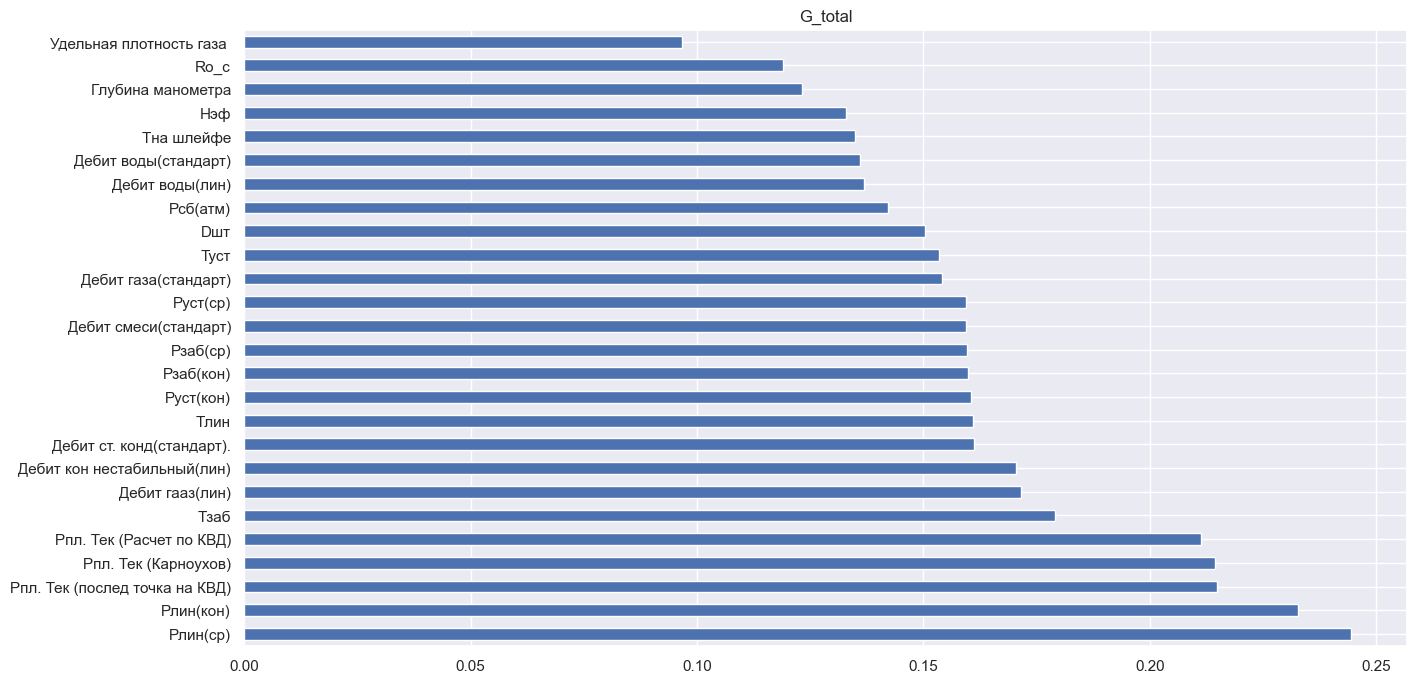

In [442]:
gain_ratio_plot(gain_ratio_dict,'G_total', features)

### Gain ratio для 'КГФ(т/тыч м3)'

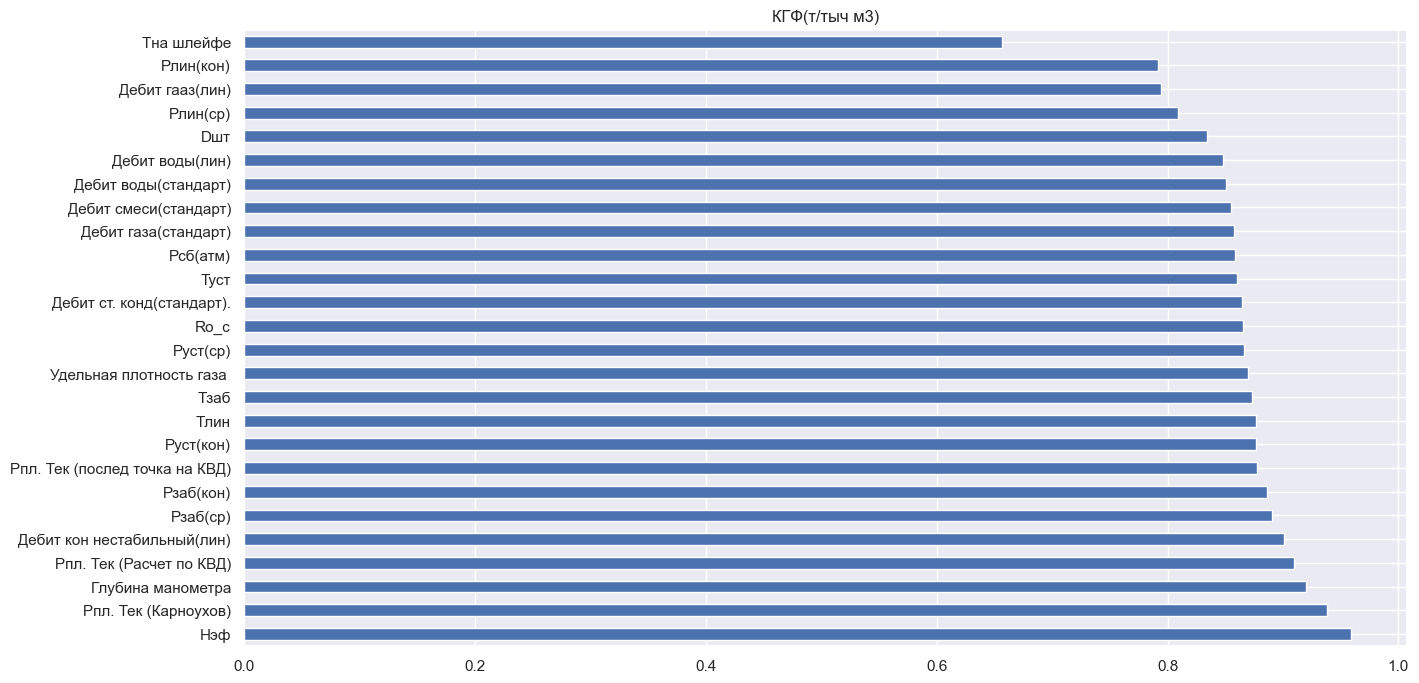

In [443]:
gain_ratio_plot(gain_ratio_dict,'КГФ(т/тыч м3)', features)

# Таблица корреляций

In [444]:
# Матрица корреляций
corr_matrix = df.corr()

In [445]:
def corr_heatmap(corr_m):
    sns.set(rc={'figure.figsize': (15, 8)})
    sns.heatmap(corr_m, annot=True, linewidths=3, cbar=False)

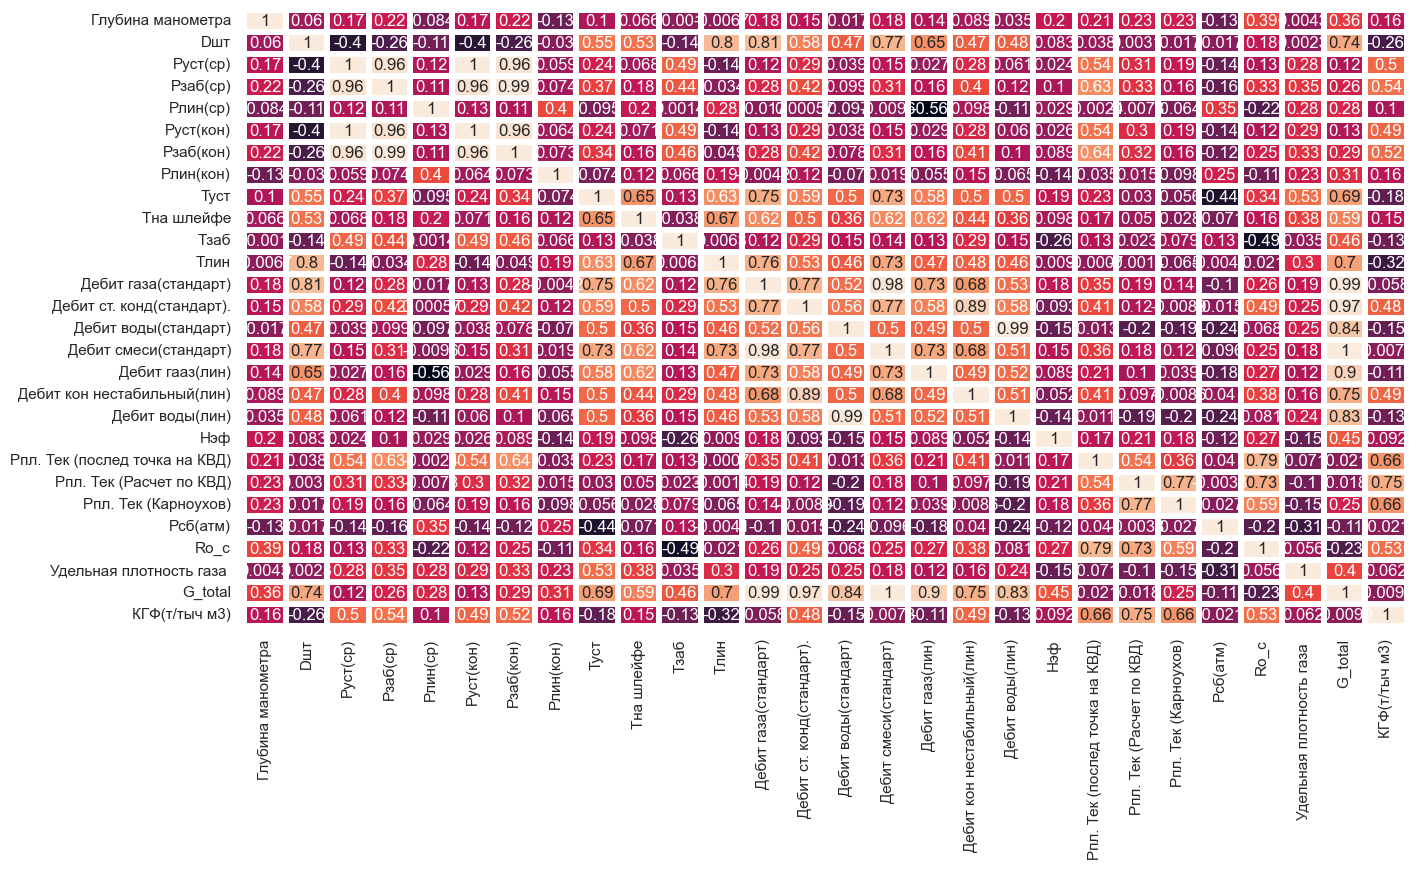

In [446]:
corr_heatmap(corr_matrix)

# Удаление признаков с сильной корреляцией

Будем считать, что для нашей задачи предельный уроверь корреляции между двумя признакми 0.9

In [447]:
correlation_threshold = 0.9
high_correlation_pair = []
for i in range(corr_matrix.columns.size):
    for j in range(i):
        if corr_matrix.iloc[i, j] > correlation_threshold:
            d1 = corr_matrix.columns[i]
            d2 = corr_matrix.columns[j]
            high_correlation_pair.append((d1,d2))

Найдем максимальные и минимальные значения gain ratio для каждого целевого признака

In [448]:
max_gain_gtotal = max((gain_ratio_dict['G_total']).values())
min_gain_gtotal = min((gain_ratio_dict['G_total']).values())

max_gain_kgf = max((gain_ratio_dict['КГФ(т/тыч м3)']).values())
min_gain_kgf = min((gain_ratio_dict['КГФ(т/тыч м3)']).values())

Выберем формулу по которой мы будем вычислять важность признака

In [449]:
def importance(feature):
    if feature in ['G_total','КГФ(т/тыч м3)']:
        return 1000
    return ((gain_ratio_dict['G_total'][feature]-min_gain_gtotal)/(max_gain_gtotal-min_gain_gtotal))*0.7+((gain_ratio_dict['КГФ(т/тыч м3)'][feature]-min_gain_kgf)/(max_gain_kgf-min_gain_kgf))*0.3

Переберем все пары сильно коррелирующих признаков и в каждой паре выберем один признак для удаления

In [450]:
def delete_features(data,feature):
    try:
        data = data.drop([feature], axis=1)
    except KeyError:
        pass
    return data

In [451]:
list_delete_features = []
for pair in high_correlation_pair:
    if pair[0] in list_delete_features or pair[1] in list_delete_features:
        continue
    print(f"Подозрительны {pair[0]} и {pair[1]} c корреляцией {corr_matrix[pair[0]][pair[1]]}")
    importance_0 = importance(pair[0])
    importance_1 = importance(pair[1])
    if importance_0>importance_1:
        df = delete_features(df, pair[1])
        list_delete_features.append(pair[1])
        print(f"Удален: {pair[1]}")
    else:
        df = delete_features(df, pair[0])
        list_delete_features.append(pair[0])
        print(f"Удален: {pair[0]}")


Подозрительны Рзаб(ср) и Руст(ср) c корреляцией 0.9589183966199203
Удален: Руст(ср)
Подозрительны Руст(кон) и Рзаб(ср) c корреляцией 0.9580676867330499
Удален: Руст(кон)
Подозрительны Рзаб(кон) и Рзаб(ср) c корреляцией 0.9891872564855017
Удален: Рзаб(кон)
Подозрительны Дебит смеси(стандарт) и Дебит газа(стандарт) c корреляцией 0.9768870078781907
Удален: Дебит газа(стандарт)
Подозрительны Дебит воды(лин) и Дебит воды(стандарт) c корреляцией 0.9901329682368989
Удален: Дебит воды(стандарт)
Подозрительны G_total и Дебит ст. конд(стандарт). c корреляцией 0.9665270217873446
Удален: Дебит ст. конд(стандарт).
Подозрительны G_total и Дебит смеси(стандарт) c корреляцией 0.996004011088595
Удален: Дебит смеси(стандарт)
Подозрительны G_total и Дебит гааз(лин) c корреляцией 0.9006592341435493
Удален: Дебит гааз(лин)


In [452]:
df

,Глубина манометра,Dшт,Рзаб(ср),Pлин(ср),Рлин(кон),Туст,Тна шлейфе,Тзаб,Tлин,Дебит кон нестабильный(лин),Дебит воды(лин),Нэф,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб(атм),Ro_c,Удельная плотность газа,G_total,КГФ(т/тыч м3)
0,3590.0,17.46,346.192061,100.369642,100.080000,65.0,NaN,103.300,39.507957,158.9,1.8,57.2000,41.88000,52.3000,51.7,93.856403,NaN,NaN,NaN,NaN
1,3590.0,14.28,371.912399,100.369642,100.080000,63.0,NaN,103.000,39.507957,158.9,1.8,57.2000,41.88000,52.3000,51.7,93.856403,NaN,NaN,NaN,NaN
2,3590.0,11.11,384.224400,100.369642,100.080000,56.0,NaN,102.900,39.507957,158.9,1.8,57.2000,41.88000,52.3000,51.7,93.856403,NaN,NaN,NaN,NaN
3,3590.0,7.93,391.823775,100.369642,100.080000,46.0,NaN,102.800,39.507957,158.9,1.8,57.2000,41.88000,52.3000,51.7,93.856403,NaN,NaN,NaN,NaN
4,3952.0,14.30,382.299225,100.369642,100.080000,55.7,NaN,107.100,39.507957,158.9,1.8,45.2000,46.20000,55.9000,50.5,93.856403,NaN,NaN,NaN,NaN
5,3952.0,11.11,397.599300,100.369642,100.080000,56.5,NaN,107.200,39.507957,158.9,1.8,45.2000,46.20000,55.9000,50.5,93.856403,NaN,NaN,NaN,NaN
6,3952.0,7.94,406.110600,100.369642,100.080000,39.5,NaN,107.400,39.507957,158.9,1.8,45.2000,46.20000,55.9000,50.5,93.856403,NaN,NaN,NaN,NaN
7,3672.3,14.29,306.710775,106.114781,106.639850,47.0,NaN,106.300,51.147601,256.8,1.5,43.0000,43.98000,58.8000,65.9,105.206020,NaN,NaN,NaN,NaN
8,3672.3,6.35,375.048408,106.175169,105.487540,25.0,NaN,106.600,24.156162,75.0,0.9,43.0000,43.98000,58.8000,65.9,104.613866,NaN,NaN,NaN,NaN
9,3672.3,9.53,356.765325,106.421502,104.837070,47.0,NaN,106.800,36.774111,156.6,5.0,43.0000,43.98000,58.8000,65.9,104.416482,NaN,NaN,NaN,NaN
